### <span style = "color:red"> Guidelines

Your project report should be delivered in Jupyter format. You should use Python to analyse
your data and implement any models.

Use the following checklist to structure your report:

<br>
    
**Title page**

An accurate and informative title of your research

<br>
    
**Summary**

One paragraph summarising the objective, procedure, results, discussion and
conclusion of the analysis.

<br>
    
    
**Introduction**

An overview of the context for the analysis, including a clear statement of the
business problem
    
Clear statement of your hypotheses and predictions

A brief overview of the approach used in your analysis.

<br>
    
**Technologies and techniques** 

An exact process description used in the analysis
    
Sufficient detail of the data analysis for someone to replicate the results (this should
be automatic in Jupyter Notebook).

<br>
    
**Results**

A presentation and summary of the data using means, histograms and other
descriptive statistics
    
Figures, tables and graphs, insofar as they help to enhance the clarity of the
information (include captions)
    
An explanation of any figures, tables or graphs.

<br>

**Discussion**

A short paragraph summarising the overall trend of the findings
    
A clear statement of whether your hypothesis is correct (include caveats where
necessary)
    
An explanation of any errors
    
A discussion of the strengths and limitations of the analysis.

<br>

**References**

Accurate documentation of sources (following convention)


<br>

<hr style="border: 0.8px dashed #7A7F92;">

# <span style =  "color:steelblue"> Title page

An accurate and informative title of your research



<br>

<hr style="border: 0.8px dashed #7A7F92;">

# <span style =  "color:steelblue"> Summary

One paragraph summarising the objective, procedure, results, discussion and
conclusion of the analysis.


<br>

<hr style="border: 0.8px dashed #7A7F92;">

   
# <span style =  "color:steelblue"> Introduction

<span style = "color:red"> instructions:  An overview of the context for the analysis, including a clear statement of the
business problem - Clear statement of your hypotheses and predictions - A brief overview of the approach used in your analysis.    
    
    
Orkney Islands, a leader in generation and reliance on renewable energy, faces a pressing challenge concerning energy curtailment. Limited by the interconnectors’ capacity and the cable connections used for export, some of the energy is currently curtailed (lost) to balance the power system. This arises from constraints in the capacity of interconnectors and cable connections utilized for export, resulting in the loss of surplus energy to maintain system equilibrium. This issue underscores a broader dilemma accompanying the transition to renewable energy sources like wind and solar, characterized by their inherent variability and limited controllability compared to traditional fossil fuel power plants. 
    
In this report, we aim to quantify the magnitude and cost of the annual curtailed energy as well as identify the drivers and patterns of curtailment which will enable us to recommend a detailed Demand-Response System solution using solutions from Kaluza that would monetise the wasted energy in a manner that benefits stakeholders along the supply chain, including the wind farmers and the consumers (Orkney Households). 
    
In our analytical pursuit, we anticipate distinct patterns and seasonality in both energy generation and curtailment, which may not align with the seasonal demand fluctuations observed over typical day-to-day or yearly cycles. Should our hypothesis hold true, it would pave the way for the implementation of a Demand-Response system, wherein residential devices are automatically managed to flexibly consume more energy can be implemented. 



<br>

<hr style="border: 0.8px dashed #7A7F92;">

# <span style="color:steelblue"> Technologies and Techniques
    
<span style="color:red"> Instructions: An exact process description used in the analysis - Sufficient detail of the data analysis for someone to replicate the results (this should be automatic in Jupyter Notebook).

To rigorously test our hypothesis, a comprehensive analysis of the available data is imperative. The dataset comprises telemetry data from a single wind turbine located on the Orkney Islands, with a generation capacity of 900 kW. Additionally, it includes average demand data sampled from various households at different time intervals.

The primary objective of the analysis is to accurately estimate the annually curtailed energy. To achieve this overarching goal, several sub-objectives need to be fulfilled:
- Estimation of Potential Energy Generation: Determining the maximum energy output that the turbine could potentially generate.
- Examination of Seasonality and Patterns of Average Residential Demand: Studying the typical demand patterns of households to ascertain consumption trends.
- <span style = "color:red; font-size: 14px"> this is in progress - should we compare it with generated power patterns?: 
    
    Examination of Seasonality and Patterns of Wind Speed: Studying the typical wind speed patterns of over the year and during the day as this would influence the turbine generation patterns. 
- <span style = "color:red; font-size: 14px"> we have not done this yet - do we want to?: 
    
    Identification of Seasonality and Patterns of Supply (Actual Power Generation): Analyzing the actual power generated by the turbine over time to discern any recurring patterns or trends.





Once an estimate of the curtailed energy is obtained, the subsequent step involves identifying its seasonality and patterns to formulate practical solutions. However, prior to starting the analysis, a throrough exploration and understanding of the two datasets are essential. This preliminary stage will involve scrutiny of the data to identify and address any potential data issues, including entry errors and missing values, ensuring the reliability and accuracy of the subsequent analysis.



## <span style = "color:navy">A- Packages and Data Import

In this section, we import essential libraries for data manipulation, analysis, and visualization, and then load the Turbine_telemetry.csv and Residential_demand.csv datasets, parsing dates for proper time-series analysis.

In [ ]:
# Only use if necessary 
# % pip install requirements.txt

In [1]:
#data wrangling packages
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

#plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.dates import DateFormatter

In [4]:
#EDA packages
from ydata_profiling import ProfileReport

#time series analysis packages
# from statsmodels.tsa.seasonal import seasonal_decomposeimport

#Curve Fit package
from scipy.optimize import curve_fit

ModuleNotFoundError: No module named 'ydata_profiling'

In [3]:
# Path of the data on your computer
path = 'Data/'

# Get data
turbine_telemetry = pd.read_csv(path + "Turbine_telemetry.csv", parse_dates=[0])
residential_demand = pd.read_csv(path + "Residential_demand.csv", parse_dates=[0])

<br>

***



## <span style = "color:navy"> B- Data Inspection and Pre-processing


### <span style = "color:blue">B.1 - Turbine Telemetry Data (Supply)

The data includes a timestamp at a second granularity, the average amount of power generated during the time interval (measured in kilo watts),  the set point representing the mean-maximum possible generator output during the time interval (measured in kilo watts), and the mean wind speed during the time interval (measured in meter per second).  


In [4]:
turbine_telemetry.head(10)

,Timestamp,Power_kw,Setpoint_kw,Wind_ms
0,2015-05-28 00:00:23,80.0,900.0,4.9
1,2015-05-28 00:01:23,78.0,900.0,5.4
2,2015-05-28 00:02:23,52.0,900.0,4.9
3,2015-05-28 00:03:23,57.0,900.0,4.6
4,2015-05-28 00:04:23,54.0,900.0,4.6
5,2015-05-28 00:05:23,44.0,900.0,4.5
6,2015-05-28 00:06:23,62.0,900.0,4.5
7,2015-05-28 00:07:23,51.0,900.0,4.1
8,2015-05-28 00:08:23,155.0,900.0,6.4
9,2015-05-28 00:09:23,90.0,900.0,5.2


<span style = "color: #0033CC"> Upon initial observation, it appears that the readings are captured at the end of 1-minute intervals. However, this hypothesis will require validation. 

<br>

<span style =  "font-size: 15px; font-weight: 800">*Inspect Data Types*

In [5]:
turbine_telemetry.dtypes #all columns are the right data types

Timestamp      datetime64[ns]
Power_kw              float64
Setpoint_kw           float64
Wind_ms               float64
dtype: object

<br>

<span style =  "font-size: 15px; font-weight: 800">*Summary Statistics of Data*

In [6]:
turbine_telemetry.describe().round(2)

,Power_kw,Setpoint_kw,Wind_ms
count,1066934.00,1066921.00,1066931.00
mean,367.19,810.66,9.96
std,339.96,261.51,5.45
min,0.00,0.00,0.00
25%,51.00,900.00,6.10
50%,251.00,900.00,9.00
75%,704.00,900.00,12.40
max,938.00,900.00,47.20


<br>  

<span style =  "font-size: 15px; font-weight: 800">*Check for Missing Values in existing entries*

In [7]:
# Count missing entries per column
missing_count = turbine_telemetry.isnull().sum()

# Display count of missing entries per column
print("\nMissing Entries per Column:")
print(missing_count)


Missing Entries per Column:
Timestamp         0
Power_kw       2702
Setpoint_kw    2715
Wind_ms        2705
dtype: int64


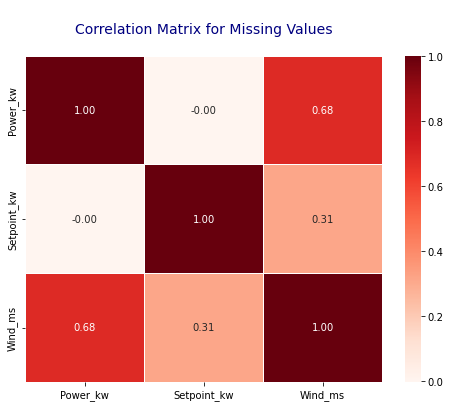

In [8]:
# Create a correlation matrix for missing values
missing_corr = turbine_telemetry.drop(columns = ['Timestamp']).isnull().corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(missing_corr, annot=True, cmap='Reds', fmt='.2f', linewidths=0.5)
plt.title('\nCorrelation Matrix for Missing Values\n',  size= 14, color="navy")
plt.show()

<br>

<span style = "color: #0033CC">There is a relatively high correlation between wind speed being missing and the power measurement being missing potentially indicating that the was an error in the telemetry at the sepecific time intervals. 

<br>
    

In [9]:
# Display % of entries with missing values
print("\nPercentage of Entries with missing values:", 
      round(turbine_telemetry.isnull().any(axis=1).sum()/len(turbine_telemetry)*100,3), "%")


Percentage of Entries with missing values: 0.506 %


<br>

<span style = "color: #0033CC">Since the percentage of entries with missing values is not material (0.51%), these entries will be excluded from the database. 
    
<br>

In [10]:
turbine_telemetry=turbine_telemetry.dropna()

<br>  
    
<span style =  "font-size: 15px; font-weight: 800">*Check Time Interval Hypothesis and Treat Missing Readings*

In [11]:
# Calculate frequency of each time difference
time_diff_counts = turbine_telemetry['Timestamp'].diff().value_counts()
total_count = time_diff_counts.sum()

# Create a DataFrame to represent the frequency table
frequency_table = pd.DataFrame({'Time Difference': time_diff_counts.index, 'Frequency': time_diff_counts.values})
frequency_table['Percentage'] = (frequency_table['Frequency'] / total_count) * 100


print("\nFrequency Table of Time Differences:\n")
print(frequency_table)


Frequency Table of Time Differences:

    Time Difference  Frequency  Percentage
0   0 days 00:01:00    1049127   98.581963
1   0 days 00:01:01       4305    0.404522
2   0 days 00:00:59       4181    0.392871
3   0 days 00:02:00       2168    0.203718
4   0 days 00:00:04       1124    0.105617
..              ...        ...         ...
146 0 days 00:15:01          1    0.000094
147 0 days 00:14:59          1    0.000094
148 0 days 00:00:37          1    0.000094
149 0 days 00:00:23          1    0.000094
150 0 days 01:08:00          1    0.000094

[151 rows x 3 columns]


In [12]:
print("The minimum time interval: ", min(frequency_table['Time Difference']))
print("The maximum time interval: ", max(frequency_table['Time Difference']))

The minimum time interval:  0 days 00:00:01
The maximum time interval:  98 days 00:01:07


<br> 

<span style = "color: #0033CC">Examining the time discrepancies reveals variations in the measurement intervals. The analysis indicates that a large majority (98.5%) of the measurements have a one-minute interval, aligning well with the initial assumption and providing a high level of confidence. Additionally, approximately 0.8% of the entries deviate by one second from the one-minute gap, which falls within an acceptable range to maintain the one-minute interval criterion, albeit posing a challenge when identifying missing or duplicate intermediate readings. Further investigation is needed for the remaining time differences. Initially, we will examine the timestamp histogram to identify the days-long gaps which we have observed in the maximum time interval.

<br>


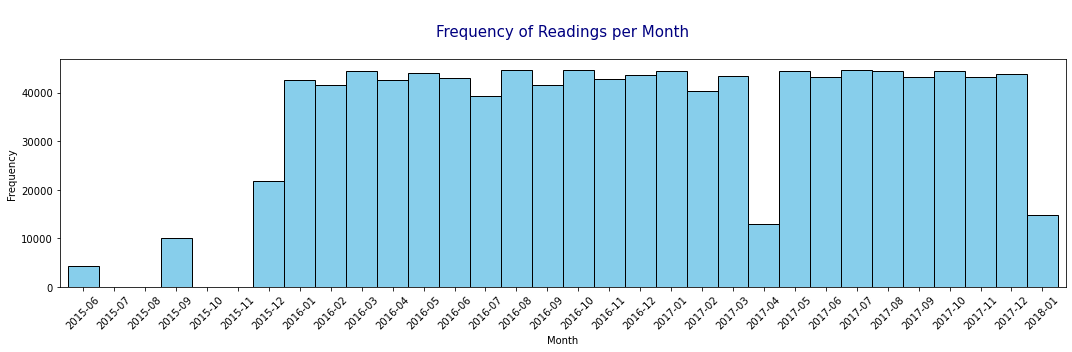

In [13]:
# Get the minimum and maximum dates from the Timestamp column
min_date = turbine_telemetry['Timestamp'].min().date()
max_date = turbine_telemetry['Timestamp'].max().date()

# Create a range of all months between the minimum and maximum dates
all_months = pd.date_range(start=min_date, end=max_date, freq='MS').to_period('M')


# Count the number of entries for each month
monthly_counts = turbine_telemetry['Timestamp'].dt.to_period('M').value_counts().reindex(all_months, fill_value=0)

# Plot the bar plot
plt.figure(figsize=(15, 5))
monthly_counts.plot(kind='bar', color='skyblue', edgecolor='black', width =1)
plt.title('\nFrequency of Readings per Month\n', size=15, color='navy')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [14]:
print("Expected average number of readings per month if all readings exist: ", int(60*24*30.47), "readings.")

Expected average number of readings per month if all readings exist:  43876 readings.


<br>

<span style = "color: #0033CC"> The plot reveals that there are limited readings spanning approximately 13 days each in May, September, and November 2015. However, starting from December 2015, it appears that each month has a comprehensive set of readings covering all time intervals, as evidenced by the total number of readings nearing the 43,000 mark. The only exception is April 2017 and January 2018, where once again only half of each month has recorded readings. 
    
<span style = "color: #0033CC"> Regarding the data prior to January 2016, it can be inferred that this period represents a testing phase of the turbine or the telemetry, during which it may not have been operating at full capacity. Therefore, these entries will be filtered out. 
    
<span style = "color: #0033CC"> Regarding the January 2018 data, this too will be discarded as it is suspected to not add much value to the analysis given its incompleteness.  


<span style = "color: #0033CC"> As for the incomplete data for April 2017, further investigation and decision-making are required to determine the appropriate approach for handling these missing readings. In the next section, we will look into identifying the missing readings. Additionally, we will test if the are any duplicate readings, although there is no striking indication of that. 

<br>


In [15]:
# Exclude data prior to January 2016
turbine_telemetry = turbine_telemetry[(turbine_telemetry['Timestamp'] >= '2016-01-01 00:00:00') &
                                      (turbine_telemetry['Timestamp'] < '2018-01-01 00:00:00')]


In [16]:
# Sense Check by displaying first entries of the filtered turbine telemetry dataframe 
turbine_telemetry.head(10)

,Timestamp,Power_kw,Setpoint_kw,Wind_ms
42051,2016-01-01 00:00:34,904.0,900.0,17.0
42052,2016-01-01 00:01:34,899.0,900.0,15.1
42053,2016-01-01 00:02:34,911.0,900.0,18.1
42054,2016-01-01 00:03:34,900.0,900.0,23.1
42055,2016-01-01 00:04:34,903.0,900.0,19.4
42056,2016-01-01 00:05:34,892.0,900.0,15.1
42057,2016-01-01 00:06:34,894.0,900.0,14.2
42058,2016-01-01 00:07:34,894.0,900.0,12.4
42059,2016-01-01 00:08:34,899.0,900.0,13.0
42060,2016-01-01 00:09:34,849.0,900.0,13.1


In [17]:
# Sense Check by displaying last entries of the filtered turbine telemetry dataframe 
turbine_telemetry.tail(10)

,Timestamp,Power_kw,Setpoint_kw,Wind_ms
1054870,2017-12-31 23:50:32,55.0,900.0,4.8
1054871,2017-12-31 23:51:32,46.0,900.0,4.8
1054872,2017-12-31 23:52:32,58.0,900.0,5.0
1054873,2017-12-31 23:53:32,52.0,900.0,4.9
1054874,2017-12-31 23:54:32,63.0,900.0,5.1
1054875,2017-12-31 23:55:32,53.0,900.0,4.9
1054876,2017-12-31 23:56:32,54.0,900.0,5.0
1054877,2017-12-31 23:57:32,67.0,900.0,5.1
1054878,2017-12-31 23:58:32,63.0,900.0,5.6
1054879,2017-12-31 23:59:32,74.0,900.0,5.4


<br>

<span style = "color: #0033CC"> An interesting observation is apparent here: while the time intervals appear to be consistently one minute apart, they are no longer consistently taken at the 23rd second, as observed in the initial entries of the database before applying the date filter. In this instance, they appear to be taken at the 34th second. This explains the discrepancies that were seen in the time differences between the consecutive readings. 
    
<br>
    

In [18]:
# Check for duplicate timestamps
duplicate_timestamps = turbine_telemetry[turbine_telemetry.index.duplicated(keep='first')]

# Print duplicate timestamps
print("Duplicate timestamps:")
print(duplicate_timestamps)

Duplicate timestamps:
Empty DataFrame
Columns: [Timestamp, Power_kw, Setpoint_kw, Wind_ms]
Index: []



<span style = "color: #0033CC">This confirms that there are no duplicated/repeated readings. 

<br>




<span style = "color: #0033CC">Now, prior to addressing missing values, we will resample the data by averaging all readings within one-minute intervals and associating them with the start of each minute (second 0), instead of varying intermediate seconds points. This adjustment ensures consistency across minute intervals despite variations in the exact second of reading within each minute.
    
<br>


In [19]:
# Resample and calculate the mean for each 30-second interval
turbine_telemetry_resampled = turbine_telemetry.set_index('Timestamp').resample('60S').mean().reset_index()

# Display the resampled DataFrame
turbine_telemetry_resampled.head(10)

,Timestamp,Power_kw,Setpoint_kw,Wind_ms
0,2016-01-01 00:00:00,904.0,900.0,17.0
1,2016-01-01 00:01:00,899.0,900.0,15.1
2,2016-01-01 00:02:00,911.0,900.0,18.1
3,2016-01-01 00:03:00,900.0,900.0,23.1
4,2016-01-01 00:04:00,903.0,900.0,19.4
5,2016-01-01 00:05:00,892.0,900.0,15.1
6,2016-01-01 00:06:00,894.0,900.0,14.2
7,2016-01-01 00:07:00,894.0,900.0,12.4
8,2016-01-01 00:08:00,899.0,900.0,13.0
9,2016-01-01 00:09:00,849.0,900.0,13.1


In [20]:
# Validate the resampling step by comparing the summary statistics of the oringinal dataframe and re-sampled dataframe

telemetry_stats = turbine_telemetry.describe()

resampled_stats = turbine_telemetry_resampled.describe()

# Concatenate summary statistics side by side
summary_comparison = pd.concat([telemetry_stats, resampled_stats], axis=1,
                               keys=('Original Telemetry Stats', 'Resampled Telemetry Stats')).astype(int)


summary_comparison


Original Telemetry Stats                      Resampled Telemetry Stats  \
                      Power_kw Setpoint_kw  Wind_ms                  Power_kw   
count                  1007421     1007421  1007421                   1004943   
mean                       361         807        9                       361   
std                        338         264        5                       338   
min                          0           0        0                         0   
25%                         48         900        6                        48   
50%                        244         900        8                       244   
75%                        687         900       12                       687   
max                        938         900       47                       938   

                            
      Setpoint_kw  Wind_ms  
count     1004943  1004943  
mean          808        9  
std           264        5  
min             0        0  
25%           900        6  
50%           900        8  
75%           900       12  
max           900       47


<br> 

<span style = "color: #0033CC"> A comparison between the original data statistics and the resampled data statistics is needed to ensure accuracy. It can be seen that all statistics are equal. Now, we move on to identifying the missing readings. 
<br>


In [21]:
# Generate a complete time range
complete_time_range = pd.date_range(start=turbine_telemetry_resampled['Timestamp'].min(), 
                                    end=turbine_telemetry_resampled['Timestamp'].max(), freq='T')

In [22]:
# Create a DataFrame with the complete time range
complete_df = pd.DataFrame({'Timestamp': complete_time_range})

# Merge the original data with the complete time range data to identify missing values
complete_tt_resampled = complete_df.merge(turbine_telemetry_resampled, on='Timestamp', how='left')

# Check for missing values
missing_values = complete_tt_resampled[complete_tt_resampled.isnull().any(axis=1)]

# Print count of missing values
print("\nCount of Missing Readings:", missing_values.shape[0], 
      f"readings, representing { round(missing_values.shape[0]/ complete_tt_resampled.shape[0],4)}%.")
# missing_values['Timestamp']


Count of Missing Readings: 47697 readings, representing 0.0453%.


In [23]:
# Convert the list to a DataFrame
missing_df = pd.DataFrame({'Timestamp': missing_values['Timestamp']})

# Extract month and year information
missing_df['MonthYear'] = missing_df['Timestamp'].dt.to_period('M')

# Count the number of timestamps for each month/year
count_per_month_year =  missing_df.groupby('MonthYear').size()


count_per_month_year

MonthYear
2016-01     2015
2016-02      308
2016-03      180
2016-04      531
2016-05      620
2016-06      235
2016-07     5580
2016-08       79
2016-09     1657
2016-10      280
2016-11      376
2016-12     1522
2017-01      295
2017-02      118
2017-03     1179
2017-04    30200
2017-05      653
2017-06      205
2017-07      160
2017-08      134
2017-09      136
2017-10      264
2017-11      242
2017-12      728
Freq: M, dtype: int64

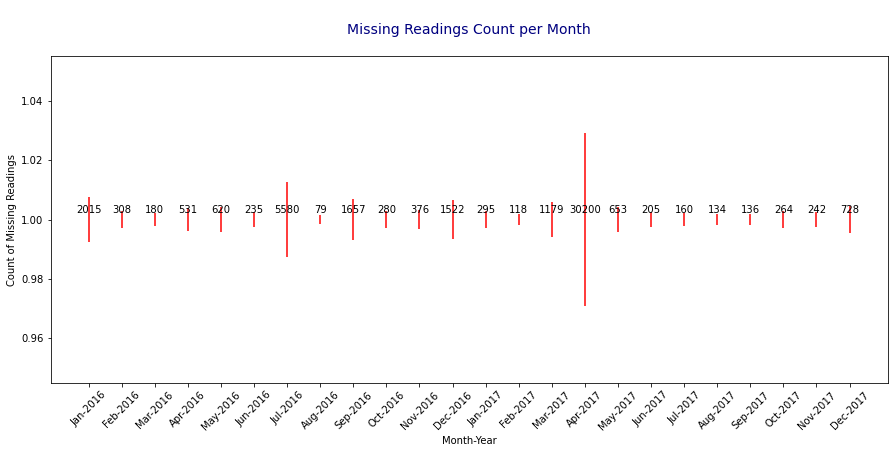

In [24]:
# Convert the list to a DataFrame
missing_df = pd.DataFrame({'Timestamp': missing_values['Timestamp']})

# Extract month and year information
missing_df['MonthYear'] = missing_df['Timestamp'].dt.to_period('M')

# Count the number of timestamps for each month/year
count_per_month_year = missing_df.groupby('MonthYear').size().reset_index(name="Count of Missing Readings")
count_per_month_year['MonthYear'] = count_per_month_year['MonthYear'].dt.strftime('%b-%Y')


# Display the result
plt.figure(figsize=(15, 6))  
plt.scatter(count_per_month_year['MonthYear'], [1]*count_per_month_year.shape[0], marker='|', color='red',
            s=count_per_month_year['Count of Missing Readings'])


for index, row in count_per_month_year.iterrows():
    plt.annotate(row['Count of Missing Readings'], 
                 xy=(row['MonthYear'], 1), 
                 xytext=(0, 5), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom')

    
plt.xlabel('Month-Year')
plt.ylabel('Count of Missing Readings')
plt.title('\nMissing Readings Count per Month\n', size=14, color="navy")
plt.xticks(rotation=45)  
plt.show()


<br> 

<span style = "color: #0033CC"> After analysing the graph above, it can be seen that a whole of months readings is missing in April 2017, the most sensible decision will be to exclude that month from the analysis, trying to fill in the missing timestamps will mean that we are creating synthetic data that will not be useful for the business case.
<br> 

In [25]:
# Drop rows for April 2017
complete_tt_resampled = complete_tt_resampled[~((complete_tt_resampled['Timestamp'].dt.year == 2017) & (complete_tt_resampled['Timestamp'].dt.month == 4))]

# Reset index if needed
complete_tt_resampled.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
print(complete_tt_resampled)

                  Timestamp  Power_kw  Setpoint_kw  Wind_ms
0       2016-01-01 00:00:00     904.0        900.0     17.0
1       2016-01-01 00:01:00     899.0        900.0     15.1
2       2016-01-01 00:02:00     911.0        900.0     18.1
3       2016-01-01 00:03:00     900.0        900.0     23.1
4       2016-01-01 00:04:00     903.0        900.0     19.4
...                     ...       ...          ...      ...
1009435 2017-12-31 23:55:00      53.0        900.0      4.9
1009436 2017-12-31 23:56:00      54.0        900.0      5.0
1009437 2017-12-31 23:57:00      67.0        900.0      5.1
1009438 2017-12-31 23:58:00      63.0        900.0      5.6
1009439 2017-12-31 23:59:00      74.0        900.0      5.4

[1009440 rows x 4 columns]



<br> 

<span style = "color: #0033CC">
Moreover, if we exclude April from this analysis, missing data represents less than 0.13% per month. Since wind readings are very unpredictable, lets analyse the patterns in the data, to decide which is the best method to way those values. Lets use the month with more missing data which will be July 2016.
<br>

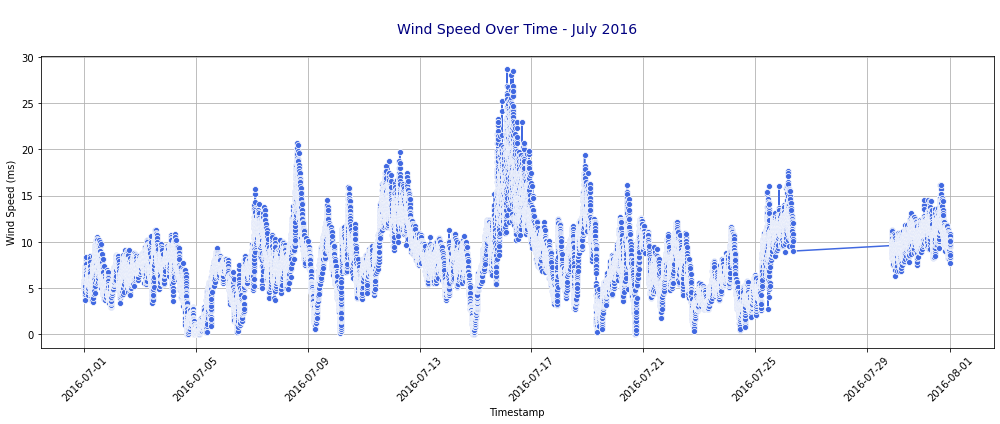

In [26]:
# Filter data for July 2016
july_2016_data = complete_tt_resampled[(complete_tt_resampled['Timestamp'].dt.month == 7) & 
                                       (complete_tt_resampled['Timestamp'].dt.year == 2016)]

# Plot the line plot of Wind_ms for July 2016 using Seaborn
plt.figure(figsize=(14, 6))  # Increase the width of the figure
sns.lineplot(data=july_2016_data, x='Timestamp', y='Wind_ms', color='royalblue', marker='o')
plt.title('\nWind Speed Over Time - July 2016\n', size=14, color="navy")
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (ms)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent cropping
plt.show()


<br> 

<span style = "color: #0033CC"> It can bee seen from the plot, that most of the missing data in july is during 4 straight days, from the 25th of July to 29th of July 2016. Lets take a closer look of this days to improve the visualization.
<br>

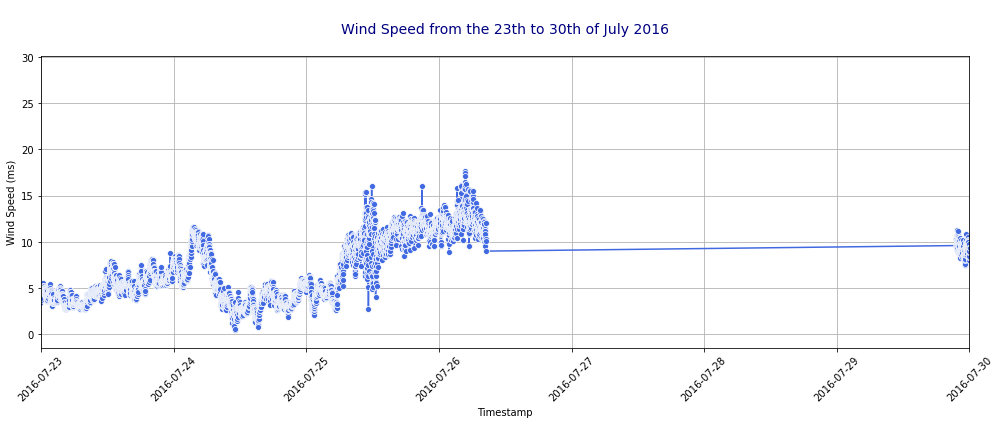

In [27]:
# Plot the line plot of Wind_ms for July 2016 using Seaborn
plt.figure(figsize=(14, 6))  # Increase the width of the figure
sns.lineplot(data=july_2016_data, x='Timestamp', y='Wind_ms', color='royalblue', marker='o')
plt.title('\nWind Speed from the 23th to 30th of July 2016\n', size=14, color="navy")
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (ms)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)

# Set x-axis limits to zoom in on July 20 to July 31
plt.xlim(pd.Timestamp('2016-07-23'), pd.Timestamp('2016-07-30'))

plt.tight_layout()  # Adjust layout to prevent cropping
plt.show()


<br> 

<span style = "color: #0033CC"> Lets analyse another month to see if it follows the same patter of missing consecutive days as July, this time we will choose January. The plot below shows that again readings are missing for consecutive days. A sensitive question to ask is why there are no readings? Did the turbine broke down or did the reader stop working?
<br>

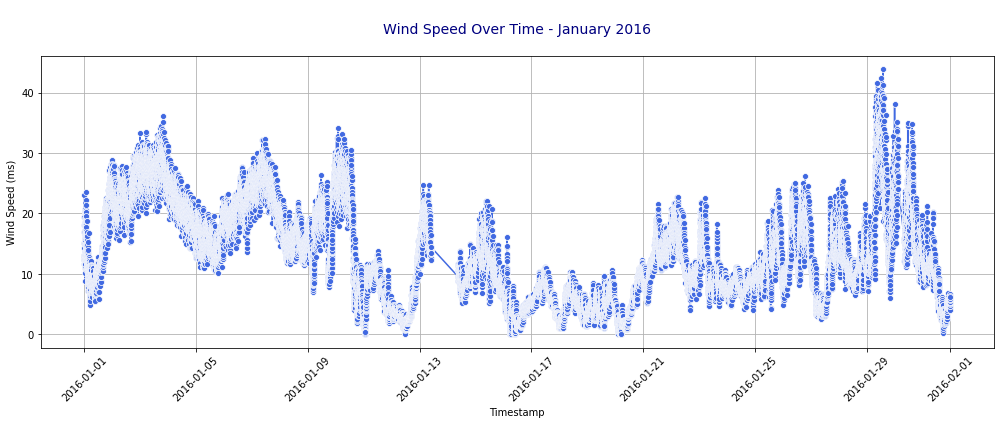

In [28]:
# Filter data for January 2016
jan_2016_data = complete_tt_resampled[(complete_tt_resampled['Timestamp'].dt.month == 1) & 
                                      (complete_tt_resampled['Timestamp'].dt.year == 2016)]

# Plot the line plot of Wind_ms for Januar 2016 using Seaborn
plt.figure(figsize=(14, 6))  # Increase the width of the figure
sns.lineplot(data=jan_2016_data, x='Timestamp', y='Wind_ms', color='royalblue', marker='o')
plt.title('\nWind Speed Over Time - January 2016\n', size=14, color="navy")
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (ms)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent cropping
plt.show()

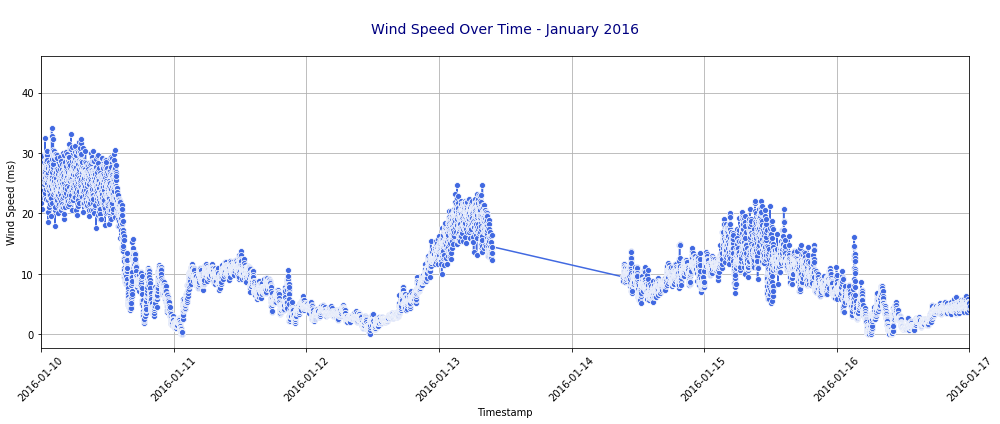

In [29]:
# Filter data for January 2016
jan_2016_data = complete_tt_resampled[(complete_tt_resampled['Timestamp'].dt.month == 1) & 
                                      (complete_tt_resampled['Timestamp'].dt.year == 2016)]

# Plot the line plot of Wind_ms for Januar 2016 using Seaborn
plt.figure(figsize=(14, 6))  # Increase the width of the figure
sns.lineplot(data=jan_2016_data, x='Timestamp', y='Wind_ms', color='royalblue', marker='o')
plt.title('\nWind Speed Over Time - January 2016\n', size=14, color="navy")
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (ms)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Set x-axis limits to zoom in on Jan 10 to Jan 17

plt.xlim(pd.Timestamp('2016-01-10'), pd.Timestamp('2016-01-17'))


plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent cropping
plt.show()



<br> 

<span style = "color: #0033CC"> Given that this behaviour occurs every month, it would be inaccurate to assume monthly turbine breakdowns or maintenance works are carried out every month. A more plausible explanation is a potential issue with the reader while power supply remains intact. Consequently, we will calculate the average of the specific missing timestamps throughout the month and use it to fill in the readings.
<br>

In [30]:
# Create columns for month and hour
complete_tt_resampled['Month'] = complete_tt_resampled['Timestamp'].dt.month
complete_tt_resampled['Hour'] = complete_tt_resampled['Timestamp'].dt.hour
complete_tt_resampled['Year'] = complete_tt_resampled['Timestamp'].dt.year

# Group by month and hour, and calculate the mean
monthly_hourly_means = complete_tt_resampled.groupby(['Year','Month', 'Hour']).mean().reset_index()
monthly_hourly_means

,Year,Month,Hour,Power_kw,Setpoint_kw,Wind_ms
0,2016,1,0,536.886750,900.000000,13.271065
1,2016,1,1,528.427844,884.324278,13.374194
2,2016,1,2,516.580952,869.468908,13.732045
3,2016,1,3,543.970115,895.114943,13.173161
4,2016,1,4,524.819436,888.211616,12.995630
...,...,...,...,...,...,...
547,2017,12,19,560.196872,841.747573,12.577454
548,2017,12,20,540.104315,841.015838,12.330421
549,2017,12,21,523.209140,841.712903,12.226613
550,2017,12,22,522.014909,857.261182,12.031640


In [31]:
# Merge the big DataFrame with the averages DataFrame to get the mean values
merged_df = pd.merge(complete_tt_resampled, monthly_hourly_means, on=['Year', 'Month', 'Hour'], how='left', suffixes=('', '_mean'))

# Identify missing values in the original columns
missing_mask = merged_df['Power_kw'].isna() | merged_df['Setpoint_kw'].isna() | merged_df['Wind_ms'].isna()

# Replace missing values with the corresponding mean values for the identified rows, excluding April 2017
exclude_april_mask = (merged_df['Month'] == 4) & (merged_df['Year'] == 2017)
merged_df.loc[missing_mask & ~exclude_april_mask, 'Power_kw'] = merged_df.loc[missing_mask & ~exclude_april_mask, 'Power_kw_mean']
merged_df.loc[missing_mask & ~exclude_april_mask, 'Setpoint_kw'] = merged_df.loc[missing_mask & ~exclude_april_mask, 'Setpoint_kw_mean']
merged_df.loc[missing_mask & ~exclude_april_mask, 'Wind_ms'] = merged_df.loc[missing_mask & ~exclude_april_mask, 'Wind_ms_mean']

# Drop the unnecessary columns
merged_df = merged_df.drop(['Power_kw_mean', 'Setpoint_kw_mean', 'Wind_ms_mean', 'Month', 'Hour', 'Year'], axis=1)

# Display the result
# print(merged_df)

In [32]:
#Updating the data set with the filled data set
complete_tt_resampled =merged_df.copy()


<br> 

<span style = "color: #0033CC"> We have succesfully filled in all missing values.
<br>

In [33]:
# Check for missing values in the merged_df DataFrame
missing_values = complete_tt_resampled.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Timestamp      0
Power_kw       0
Setpoint_kw    0
Wind_ms        0
dtype: int64


<!-- <span style = "color: #0033CC">If we want to join this table with the demand side, which has data for all of 2017, it can be seen that most of the values for the 1 minute interval during 2017 are missing, even whole months data. It is neccesary to analyse how are the intervals distributed during 2017, to be able to take a decision regarding missing values in that period -->

<br>  
    
<span style =  "font-size: 15px; font-weight: 800">*Setpoint Efficacy*
    
To conclude our assessment of data accuracy, we must examine the alignment between the setpoint and the actual power generated. Ideally, when a turbine is subjected to forced curtailment by the network operator, the power generated should consistently remain below or at the setpoint. However, we hypothesize that there may be instances where the generated power slightly exceeds the setpoint due to potential operational factors or system dynamics that fail to foresee and curtail the power before it is generated. We allow for a 10% in excess of the setpoint. 

In [34]:
# identify instances where power exceeded the setpoint 

setpoint_grace_factor = 0.1
power_exceeds_setpoint_df = complete_tt_resampled[complete_tt_resampled['Power_kw'] > 
                                                  (1+setpoint_grace_factor) * complete_tt_resampled['Setpoint_kw']] 

print(f"\nThere are {power_exceeds_setpoint_df.shape[0]} instances where power exceeded 110% of the setpoint value, \
representing {round(power_exceeds_setpoint_df.shape[0]/complete_tt_resampled.shape[0]*100,3)}% of all records.\n")


There are 24627 instances where power exceeded 110% of the setpoint value, representing 2.44% of all records.



In [35]:
# Cap Power at setpoint
complete_tt_resampled['Power_kw'] = np.min([complete_tt_resampled['Setpoint_kw'],
                                            complete_tt_resampled['Power_kw']], axis=0)


<br> 

<span style = "color: #0033CC"> We cap the values for power at the setpoint.
<br>

<br>

### <span style = "color:blue">B.2 - Residential Demand Data

The data includes a timestamp at a second granularity, the average demand during the time interval (measured in kilo watts),  and the number of households included in the statistics of the measurement time interval. 



In [36]:
residential_demand.head(10)

,Timestamp,Demand_mean_kw,N_households
0,2017-01-01 00:00:00,0.220106,5428
1,2017-01-01 00:30:00,0.205945,5429
2,2017-01-01 01:00:00,0.189090,5429
3,2017-01-01 01:30:00,0.173118,5429
4,2017-01-01 02:00:00,0.159051,5429
5,2017-01-01 02:30:00,0.147656,5429
6,2017-01-01 03:00:00,0.136673,5429
7,2017-01-01 03:30:00,0.130484,5429
8,2017-01-01 04:00:00,0.124209,5429
9,2017-01-01 04:30:00,0.120191,5429


<br>

<span style = "color: #0033CC">Upon initial observation, it appears that the readings are captured at the end of 30-minute intervals. However, similar to the telemetry dataset, this hypothesis will require validation. 

<br>

<br>

<span style =  "font-size: 15px; font-weight: 800">*Inspect Data Types*

In [37]:
residential_demand.dtypes #all columns are the right data types

Timestamp         datetime64[ns]
Demand_mean_kw           float64
N_households               int64
dtype: object

<br>

<span style =  "font-size: 15px; font-weight: 800">*Summary Statistics of Data*

In [38]:
residential_demand.describe().round(3)

,Demand_mean_kw,N_households
count,17568.000,17568.000
mean,0.219,8630.642
std,0.090,2999.142
min,0.087,5406.000
25%,0.144,6781.000
50%,0.212,8190.500
75%,0.274,9652.000
max,0.510,30037.000


<br>

<span style = "color: #0033CC">The summary statistics reveal notable outliers in the data, particularly evident in the maximum value for the number of households, which stands at 30,000 (significantly higher than the published 2011 and 2022 Scotland Census data). Such extreme values are indicative of potential data errors or anomalies that warrant further investigation. 

    
<span style = "color: #0033CC">*Source: https://www.scotlandscensus.gov.uk/documents/scotland-s-census-2022-rounded-population-estimates-data/*
    
<br>    
    
<span style = "color: #0033CC">Regarding the hypothesis regarding the mean demand for a 30-minute interval, initial calculations suggest a reasonable estimate. Extrapolating this estimate to a daily interval by multiplying it by 48 half-hour intervals yields an average total daily demand of 10.5 kWh, with a minimum of 4.36 kWh and a maximum of 24.64 kWh. This extrapolation method provides a simplistic yet informative approximation of daily demand patterns.
    
<span style = "color: #0033CC">Further extrapolating this daily estimate to an annual scale by multiplying it by 365 days yields an average annual demand of approximately 3,833 kWh. This estimation aligns closely with data from the published 2018 Sub-national electricity and gas consumption summary report, which indicates that the average annual domestic consumption per meter in Scotland was reported as 3,443 kWh. It's worth noting that the report's heatmap highlights the Orkney Islands as having one of the highest average consumption rates, further corroborating the consistency of the extrapolated estimate with regional consumption trends.
    
<br>
    
<span style = "color: #0033CC">*Source: https://assets.publishing.service.gov.uk/media/5dfa803aed915d54ab87c860/sub-national-electricity-and-gas-consumption-summary-report-2018.pdf*

<br>  

<span style =  "font-size: 15px; font-weight: 800">*Check for Missing Values in existing entries*

In [39]:
# Count missing entries per column
missing_count = residential_demand.isnull().sum()

# Display count of missing entries per column
print("Missing Entries per Column:")
print(missing_count)

Missing Entries per Column:
Timestamp         0
Demand_mean_kw    0
N_households      0
dtype: int64


<br> 

<span style = "color: #0033CC"> There are no missing values.
<br>

<br>  

<span style =  "font-size: 15px; font-weight: 800">*Check Time Interval Hypothesis and identify missing readings*

In [40]:
residential_demand['Timestamp'].diff().describe()

count              17567
mean     0 days 00:30:00
std      0 days 00:00:00
min      0 days 00:30:00
25%      0 days 00:30:00
50%      0 days 00:30:00
75%      0 days 00:30:00
max      0 days 00:30:00
Name: Timestamp, dtype: object

<br>

<span style = "color: #0033CC">It is confirmed that the time interval between measurements is 30 minutes. 

<br>  

<span style =  "font-size: 15px; font-weight: 800">*Examine Number of Households Evolution over Time and Treat Outliers*

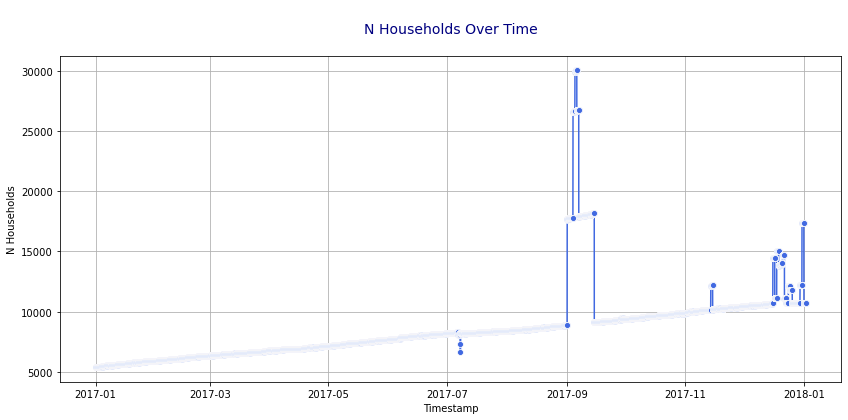

In [41]:
# Plot the line plot of N_households over time using Seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=residential_demand, x='Timestamp', y='N_households', color='royalblue', marker='o')
plt.title('\nN Households Over Time\n', size= 14, color="navy")
plt.xlabel('Timestamp')
plt.ylabel('N Households')
plt.grid(True)
plt.show()

<br>

<span style = "color: #0033CC">The irregular spikes and dips observed in the number of households during July 2017, September 2017, November 2017, December 2017, and January 2018 are deemed data anomalies since there is no discernible rationale for such abrupt fluctuations in the aggregated statistics, specially knowing that the number of households in Orkney Islands during 2022 was 10,600 households according to the published 2022 Scotland Census data. Consequently, these anomalous entries will be substituted with values that align with the gradual upward trend apparent in the dataset. To identify this trend and the reasonable ranges for the movement from one point to the next, further analysis will be conducted.

    
<span style = "color: #0033CC">It is important to take a step back here and recognize that the observed increasing trend in household numbers does not accurately reflect the total population of the Orkney Islands. According to the published 2022 Scotland Census data, the number of households in 2011 was reported as 9,725. Therefore, it is highly improbable that by 2017, the number of households would have dropped to 5,000 and then subsequently increased every 30 minutes to reach the 10,000 household mark by 2018. This discrepancy suggests that the data represents a growing sample of households included in the data collection and processing over the course of the year. It is plausible that smart meters were gradually installed in households during this period, allowing for the gradual capture of household data.   
    
<span style = "color: #0033CC">*Source: https://www.scotlandscensus.gov.uk/documents/scotland-s-census-2022-rounded-population-estimates-data/*
    

 
<br>

In [42]:
residential_demand['Household_Movement'] = residential_demand['N_households'].diff()

residential_demand['Household_Movement'].describe()

count    17567.000000
mean         0.301873
std        165.390389
min      -9069.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       8795.000000
Name: Household_Movement, dtype: float64

In [43]:

# Step 1: Identify thresholds for spikes and troughs
threshold = 100

# Step 2: Replace anomalies with values following linear trend
smooth_data = residential_demand['N_households'].copy()  # Create a copy of the original data to work with

for index in range(1,len(smooth_data)):
    # Identify if movement in number of households exceeds the threshold
    if np.abs((smooth_data.iloc[index] - smooth_data.iloc[index-1]))>threshold:
        
        # Select smoothed readings prior to the anomaly index
        indices = list(range(0,index-1))
        y = smooth_data.iloc[indices]
        
        # Fit linear model
        linear_model = np.polyfit(indices, y, 1)
    
        # Predict values along the linear trend
        x_pred = [index]
        y_pred = np.polyval(linear_model, x_pred)
    
        # Replace anomaly with predicted values
        smooth_data.loc[index] = y_pred[0]  


# Update 'N_households' column with smoothed data
residential_demand['N_households'] = smooth_data


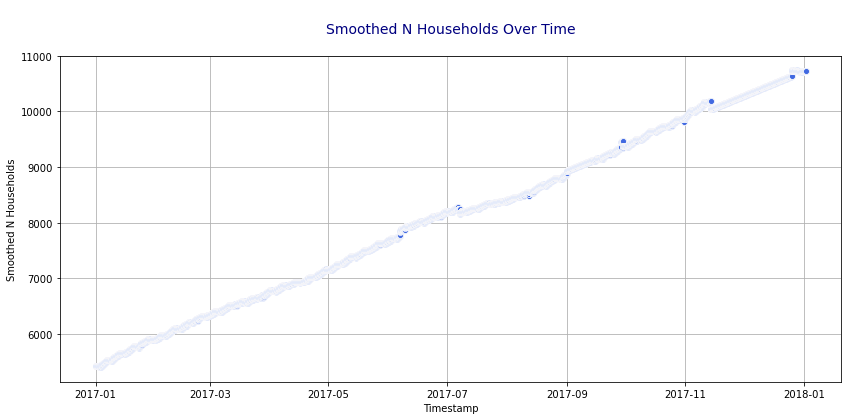

In [44]:
# Plot the line plot of N_households over time using Seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=residential_demand, x='Timestamp', y='N_households', color='royalblue', marker='o')
plt.title('\nSmoothed N Households Over Time\n', size= 14, color="navy")
plt.xlabel('Timestamp')
plt.ylabel('Smoothed N Households')
plt.grid(True)
plt.show()


<br>

  


<span style =  "font-size: 15px; font-weight: 800">*Examine Mean Demand Evolution over Time*

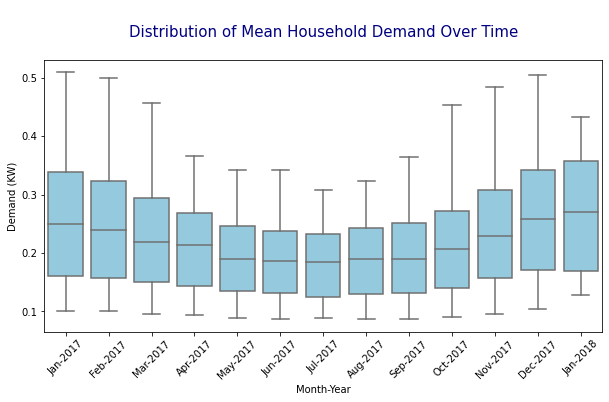

In [45]:
# Extract month and year from 'Timestamp' column and combine them
residential_demand['Month_Year'] = residential_demand['Timestamp'].dt.strftime('%b-%Y')

# Set the order of months for plotting
month_order = residential_demand['Month_Year'].unique()

# Create the box plot per month using Seaborn
plt.figure(figsize=(10, 5))
sns.boxplot(data=residential_demand, x='Month_Year', y='Demand_mean_kw', order=month_order, color='skyblue')
plt.title('\nDistribution of Mean Household Demand Over Time\n', size= 15, color="navy")
plt.xlabel('Month-Year')
plt.ylabel('Demand (KW)')
plt.xticks(rotation=45)
plt.show()


<br>

<span style = "color: #0033CC">Examining the distribution of demand over the course of a year reveals a monthly seasonality. This pattern suggests that, on average, demand peaks during the winter months and declines to its lowest levels during the summer months. This observed seasonality aligns with expectations for a region like the UK, where there is typically heightened demand for electricity during colder periods for heating and lighting purposes. While during the summer months, the demand for electricity typically diminishes as temperatures do not necessitate extensive use of air conditioning or other cooling systems.

<span style = "color: #0033CC">The boxplots further reinforce the reliability of the data, where there are no suspicious outliers or extreme values within the dataset that would raise concerns regarding data accuracy or integrity. This absence of significant anomalies provides confidence in the validity of the observed demand patterns and trends.  

   
<br>
    
<span style = "color: #0033CC">Now that we are confident of the data quality, next section will focus on disecting the demand seasonality over the day and over the week. 

<br>

***




## <span style = "color:navy"> C- Average Demand Seasonality

<br>

We will investigate the variations in average household demand throughout the day and across the days of the week. To accomplish this, we'll compute the weighted mean demand per day, month, and hour, considering both the demand mean in kilowatts per reading and the number of households. This involves defining new date-related variables and calculating the weighted mean for each reading as $\small{\text{ Demand_mean_kw per reading } * \text{ Number of Households}}$.

In [46]:
residential_demand['Month'] = residential_demand['Timestamp'].dt.strftime('%B')

residential_demand['Hour'] = residential_demand['Timestamp'].dt.hour

residential_demand['Weekday'] = residential_demand['Timestamp'].dt.strftime('%A')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
residential_demand['Weekday'] = pd.Categorical(residential_demand['Weekday'], categories=day_order, ordered=True)

residential_demand['Weighted_Mean_Demand'] = residential_demand['Demand_mean_kw'] * residential_demand['N_households']


<br>

### <span style = "color:blue">C.1 - Demand Patterns over 24 Hours

C:\Users\Noha\AppData\Local\Temp\ipykernel_47392\3048260959.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_mean_demand = residential_demand.groupby(['Month', 'Hour'])['Weighted_Mean_Demand', 'N_households'].sum()


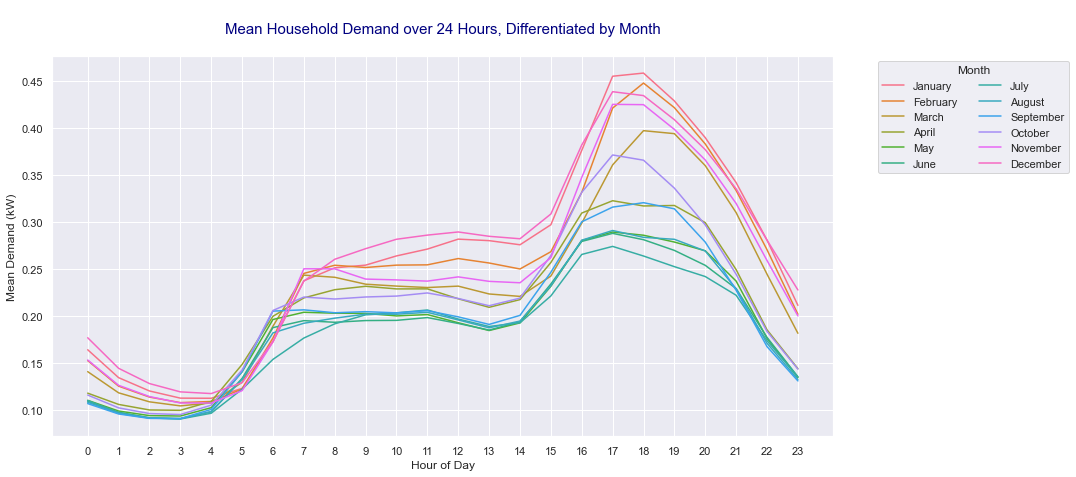

In [47]:
# Calculate weighted average mean demand per hour
hourly_mean_demand = residential_demand.groupby(['Month', 'Hour'])['Weighted_Mean_Demand', 'N_households'].sum()
hourly_mean_demand['Mean_Demand_per_Hour'] = hourly_mean_demand['Weighted_Mean_Demand'] / hourly_mean_demand['N_households']


# Set the order of months for plotting
month_names_ordered = residential_demand['Month'].unique()

# Define a color palette
month_palette = sns.color_palette("husl", len(month_names_ordered))

# Plot mean demand per hour during each month of the year
sns.set_theme()
plt.figure(figsize=(14, 7))

for i, month in enumerate(month_names_ordered):
    monthly_data = hourly_mean_demand.loc[month]
    plt.plot(monthly_data.index, monthly_data['Mean_Demand_per_Hour'], label=f'{month}', color=month_palette[i])

plt.title('\nMean Household Demand over 24 Hours, Differentiated by Month\n', size=15, color="navy")
plt.xlabel('Hour of Day')
plt.ylabel('Mean Demand (kW)')
plt.legend(title = "Month", labels=  month_names_ordered, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.xticks(range(0, 24))

plt.show()





<br>

<span style = "color: #0033CC"> Typically, residential demand exhibits a cyclical pattern characterized by distinct peak and off-peak periods, as evidenced in each month's line plot. These periods can be described as follows:

- <span style = "color: #0033CC">  Midnight to Early Morning (Pre-Dawn Hours): Demand remains relatively low during the early morning hours as residents are asleep, resulting in minimal energy usage. Consumption during this time primarily accounts for essential appliances like refrigerators and heating systems.


- <span style = "color: #0033CC">  Morning to Afternoon: Demand gradually rises during the morning hours as occupants engage in daily routines and prepare for the day, noticeable around hours 5-7. Peak energy consumption occurs during mid-morning to early afternoon when households are fully active, and consumption remains relatively stable till late afternoon (around 2 pm - hour 14).


- <span style = "color: #0033CC">  Late Afternoon to Evening (Peak Period): The highest demand is observed in the late afternoon to early evening as residents return home from work or school, typically around 6 pm (hour 18). This period, known as the "evening peak", sees simultaneous usage of lighting, cooking appliances, entertainment devices, and heating systems.


- <span style = "color: #0033CC">  Evening to Night: Demand gradually declines in the evening as households wind down activities, have dinner, and prepare for bedtime. Consumption further decreases during late night and early morning hours as residents sleep, resulting in the day's lowest demand levels, and then the cycle is repeated. 

<span style = "color: #0033CC">  Seasonal variations also influence demand patterns across different months. For instance, the severity of the evening peak is more pronounced during winter months compared to summer months. This difference can be attributed to increased lighting usage due to earlier sunsets and heightened heating demand to combat low temperatures during winter.
 
<br>
    
<span style = "color: #0033CC"> We will next investigate the variations in the average household demand over the 24 hours of the day during different week days.      
    
<br>


C:\Users\Noha\AppData\Local\Temp\ipykernel_47392\454797243.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_mean_demand = residential_demand.groupby(['Weekday', 'Hour'])['Weighted_Mean_Demand', 'N_households'].sum()


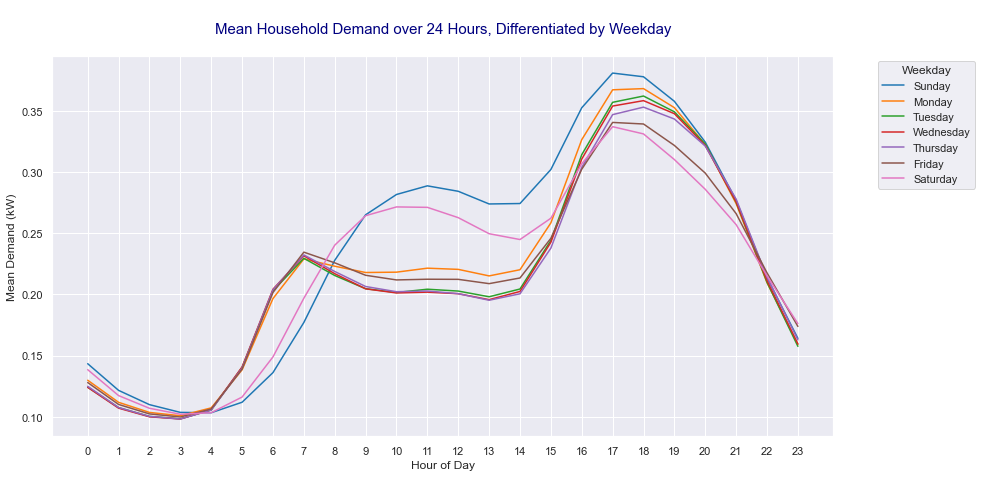

In [48]:
# Calculate weighted average mean demand per hour
hourly_mean_demand = residential_demand.groupby(['Weekday', 'Hour'])['Weighted_Mean_Demand', 'N_households'].sum()
hourly_mean_demand['Mean_Demand_per_Hour'] = hourly_mean_demand['Weighted_Mean_Demand'] / hourly_mean_demand['N_households']


# Set the order of months for plotting
day_names_ordered = residential_demand['Weekday'].unique()

# Define a color palette
day_palette = sns.color_palette("tab10", len(day_names_ordered))

# Plot mean demand per hour during each month of the year
sns.set_theme()
plt.figure(figsize=(14, 7),facecolor='white')

for i, day in enumerate(day_names_ordered):
    day_data = hourly_mean_demand.loc[day]
    plt.plot(day_data.index, day_data['Mean_Demand_per_Hour'], label=f'{day}', color=day_palette[i])

plt.title('\nMean Household Demand over 24 Hours, Differentiated by Weekday\n', size=15, color="navy")
plt.xlabel('Hour of Day')


plt.ylabel('Mean Demand (kW)')
plt.legend(title = "Weekday", labels = day_names_ordered, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 24))

plt.show()

<br>

<span style = "color: #0033CC">Analyzing the average household demand by week day reveals another layer of consumption behavior. While the overall pattern remains consistent, further segmentation by weekdays sheds light on distinct consumption patterns influenced by workdays (Monday to Friday).
    
<span style = "color: #0033CC">On workdays (or school days), we observe a peak in demand during the morning to early afternoon hours, particularly around 6-7 am. This peak gradually decreases to a stable rate throughout the late afternoon. While weekends exhibit a delayed peak in demand, occurring around 10-11 am. This delay is logical considering that many individuals tend to wake up later on weekends and commence their daily activities at a later hour compared to workdays. During late afternoon to evening hours, consistent patterns are observed across both weekdays and weekends, as discussed previously. 
   
<br>



<br>

### <span style = "color:blue">C.2 - Demand Patterns over the Week

C:\Users\Noha\AppData\Local\Temp\ipykernel_47392\3130044760.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daily_mean_demand = residential_demand.groupby(['Month', 'Weekday'])['Weighted_Mean_Demand', 'N_households'].sum()


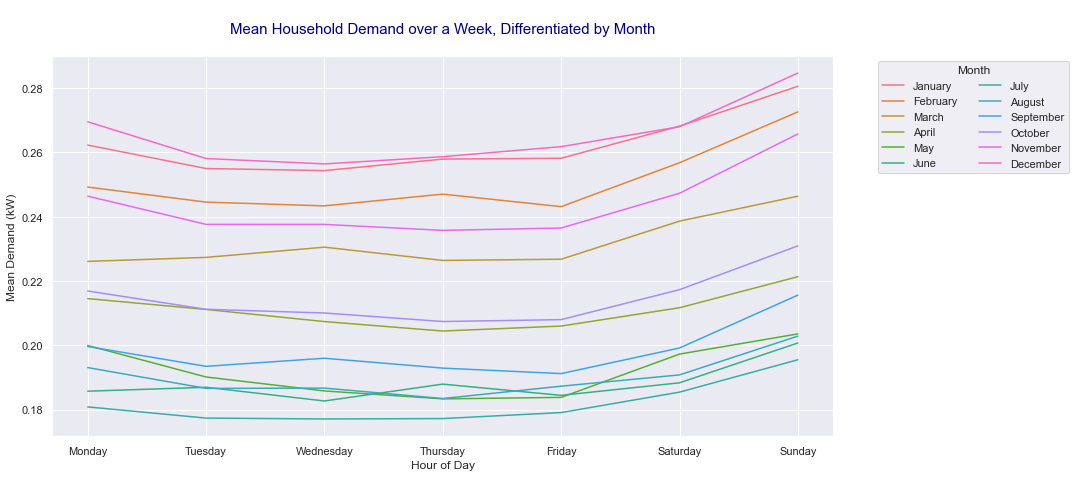

In [49]:
# Calculate weighted average mean demand per day of the week
daily_mean_demand = residential_demand.groupby(['Month', 'Weekday'])['Weighted_Mean_Demand', 'N_households'].sum()
daily_mean_demand['Mean_Demand_per_Weekday'] = daily_mean_demand['Weighted_Mean_Demand'] / daily_mean_demand['N_households']



# Plot mean demand per hour during each month of the year
sns.set_theme()
plt.figure(figsize=(14, 7))

for i, month in enumerate(month_names_ordered):
    monthly_data = daily_mean_demand.loc[month]
    plt.plot(monthly_data.index, monthly_data['Mean_Demand_per_Weekday'], label=f'{month}', color=month_palette[i])

plt.title('\nMean Household Demand over a Week, Differentiated by Month\n', size=15, color="navy")
plt.xlabel('Hour of Day')
plt.ylabel('Mean Demand (kW)')
plt.legend(title = "Month", labels = month_names_ordered, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)


plt.show()

<br>

<span style = "color: #0033CC"> Our examination of household electricity demand reveals intriguing cyclical trends over a week. Traditionally, one would expect higher demand on weekdays compared to weekends. However, focusing specifically on residential demand, we uncover a unique pattern. Peak demand occurs on Sundays, followed by Saturdays.

<span style = "color: #0033CC"> This deviation from the expected weekday peak can be attributed to the unique dynamics of residential energy consumption. During weekends, especially on Sundays, households typically experience higher occupancy levels as residents spend more time at home engaging in various activities. This increased presence leads to greater utilization of home appliances, lighting, heating, and other amenities, consequently driving up electricity demand.

<span style = "color: #0033CC"> In contrast, weekdays often see lower residential demand due to the prevalence of work and school commitments, resulting in many occupants being away from home for significant portions of the day. 

<span style = "color: #0033CC"> This observation underscores the importance of considering specific contexts when analyzing energy demand patterns, especially in addressing the energy curtailment conundrum that we will delve into quantifying in later sections of this report. Understanding these nuances is vital for accurately assessing the issue and devising effective solutions.

<br>
    
<span style = "color: #0033CC"> In the next section, we will conduct a similar analysis of the wind speed of the sample turbine to explore its seasonality patterns.  

<br>

***




## <span style = "color:navy"> D- Wind Speed Analysis

We will investigate the variations in wind speed throughout the day and across the days of the week differentiating it per month. To accomplish this, we'll compute mean wind speed  per day, month, and hour.

In [50]:
# Extract month, hour, and weekday from the timestamp
complete_tt_resampled['Month'] = complete_tt_resampled['Timestamp'].dt.strftime('%B')
complete_tt_resampled['Hour'] = complete_tt_resampled['Timestamp'].dt.hour
complete_tt_resampled['Weekday'] = complete_tt_resampled['Timestamp'].dt.strftime('%A')

# Group the data by month and hour, calculate the mean wind speed
wind_grouped_data = complete_tt_resampled.groupby(['Month', 'Hour'])['Wind_ms'].mean().reset_index()


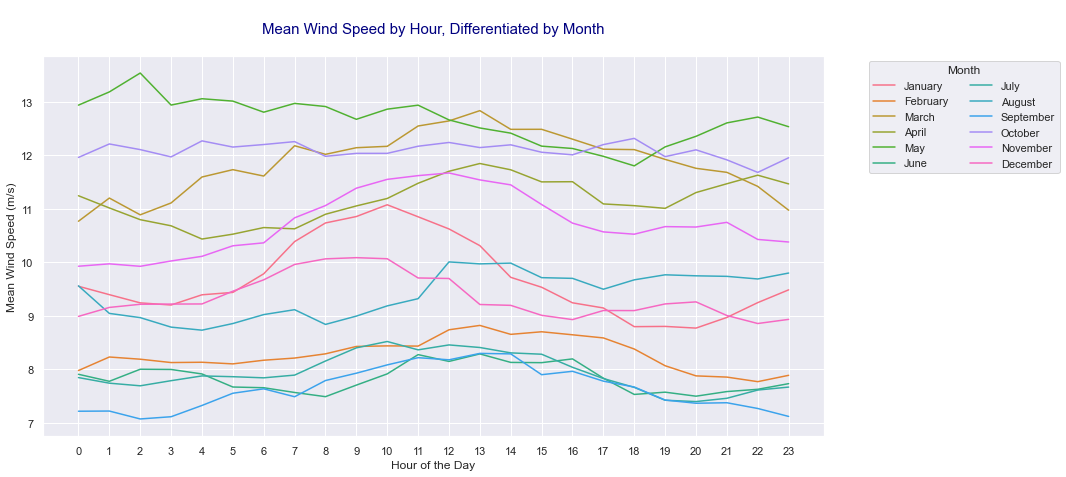

In [51]:
# Create a white background figure
plt.figure(figsize=(14, 7))

# Create a line plot using seaborn with the custom color palette
sns.set_theme()
sns.lineplot(data=wind_grouped_data, x='Hour', y='Wind_ms', hue='Month', palette=month_palette)

# Set legend labels with month names
plt.legend(title='Month', labels = month_names_ordered,  bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.title('\nMean Wind Speed by Hour, Differentiated by Month\n', size= 15, color = "navy")
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Wind Speed (m/s)')
plt.xticks(range(24)) 
plt.show()

<br>
    
<span style = "color: #0033CC"> The graph provides an intriguing visualization of wind speed patterns over the course of a day, differentiated by month. September and June emerge as the periods with the least wind activity, displaying the lowest average speeds that may correlate with transitional phases between the more extreme seasons. On the other hand, May, March, and October stand out as months with heightened wind speeds, suggesting that these times of the year are characterized by more dynamic wind conditions. Across all months, there is a noticeable peak in wind speeds around midday, indicating a consistent daily rhythm in wind behavior regardless of the season. This midday increase could be attributed to the solar heating effect, where the sun's peak position leads to more turbulent and faster-moving air currents.
    
<br>

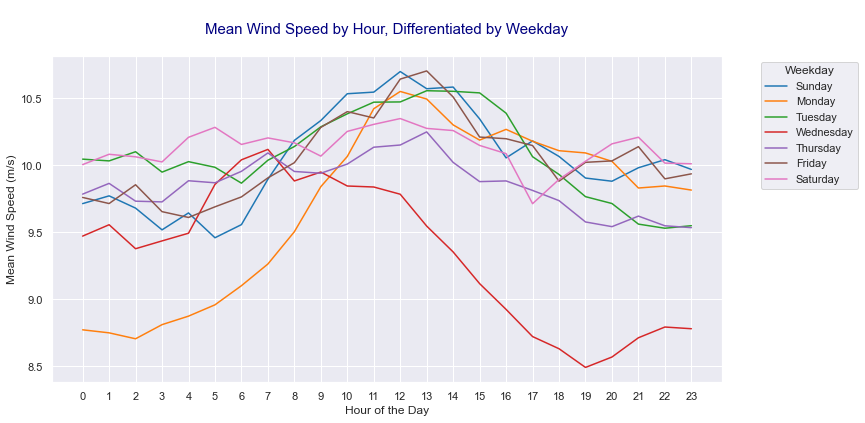

In [52]:
# Group the data by weekday and hour, calculate the mean wind speed
grouped_data = complete_tt_resampled.groupby(['Weekday', 'Hour'])['Wind_ms'].mean().reset_index()

# Define a custom color palette for each weekday
# custom_palette = sns.color_palette("husl", n_colors=7) 

# Create a white background figure
sns.set_theme()
plt.figure(figsize=(12, 6), facecolor='white')

# Create a line plot using seaborn with the custom color palette
sns.lineplot(data=grouped_data, x='Hour', y='Wind_ms', hue='Weekday', palette=day_palette)


plt.legend(title='Weekday', labels = day_names_ordered, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('\nMean Wind Speed by Hour, Differentiated by Weekday\n', size= 15, color = "navy")
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Wind Speed (m/s)')
plt.xticks(range(24))  
plt.show()

<br>
    
<span style = "color: #0033CC"> The provided graph offers a detailed view of the average wind speed fluctuations throughout the hours of a day, distinguished by each weekday. It highlights that peak wind speeds are predominantly recorded on Sundays and Fridays, indicating a tendency for stronger winds to conclude and commence the weekend. Contrarily, Thursdays and Wednesdays are characterized by some of the lowest wind speeds during these same peak times. The early morning hours on Wednesdays and Saturdays stand out with their own peaks, suggesting an atypical increase in wind activity that is not observed on other days. Monday's pattern is particularly intriguing, beginning with significantly lower wind speeds than other weekdays but rising to a peak and then settling at a point that, while below this peak, is substantially higher than where it started. A notable trend on Wednesday shows a pronounced decrease in wind speed starting from around 7 AM, descending persistently until the late evening, and then experiencing a slight recovery, yet it remains much lower in comparison to other weekdays. These daily patterns underscore the intricate and variable nature of wind behavior.
    
<br>

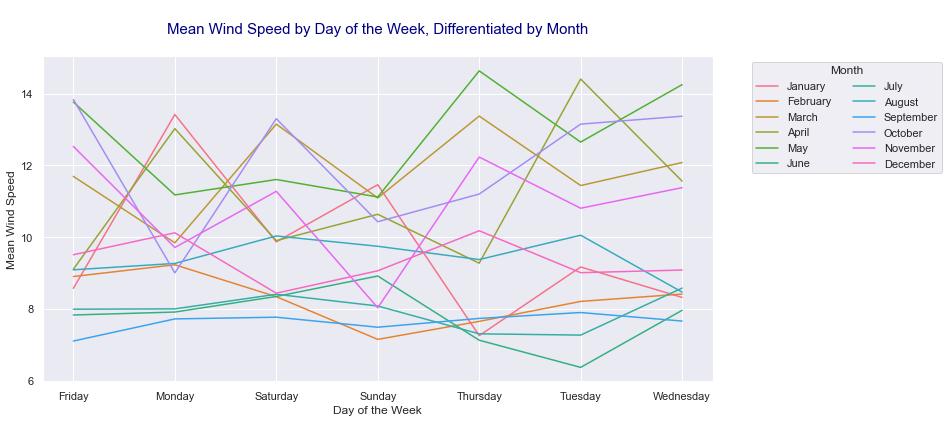

In [53]:
# Group the data by month, weekday, and calculate the mean wind speed
grouped_data = complete_tt_resampled.groupby(['Month', 'Weekday'])['Wind_ms'].mean().reset_index()

# Define a custom color palette for each month
custom_palette = sns.color_palette("husl", n_colors=12)  # You can choose another seaborn color palette or create your own

# Set the seaborn style
sns.set_theme()

# Create a white background figure
plt.figure(figsize=(12, 6), facecolor='white')

# Create a line plot using seaborn with the custom color palette
sns.lineplot(data=grouped_data, x='Weekday', y='Wind_ms', hue='Month', palette=month_palette)

plt.legend(title='Month', labels = month_names_ordered, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.title('\nMean Wind Speed by Day of the Week, Differentiated by Month\n', size= 15, color = "navy")
plt.xlabel('Day of the Week')
plt.ylabel('Mean Wind Speed')
plt.grid(True)
plt.xticks(range(7))
plt.show()

<br>
    
<span style = "color: #0033CC"> Analyzing the graph "Mean Wind Speed by Day of the Week, Differentiated by Month", we observe that Thursdays generally show the highest wind speeds across the spectrum of months, with Tuesdays following closely—although there are notable exceptions where this trend does not hold. Moreover, September stands out distinctly from the other months, manifesting the most stable and consistently low wind speeds throughout the week. The relative flatness of September's line, with only minor fluctuations, suggests a period of stability during this month.
    
<br>    

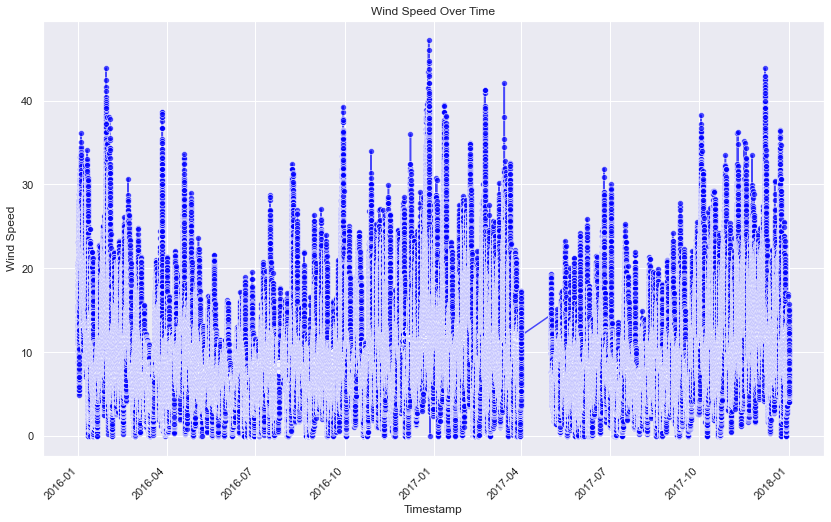

In [54]:
# Set the seaborn style
sns.set_theme()

# Create a white background figure
plt.figure(figsize=(14, 8), facecolor='white')

# Create a line plot using seaborn
sns.lineplot(data=complete_tt_resampled, x='Timestamp', y='Wind_ms', color='blue', alpha=0.7, marker='o')

# Set x-axis label to be more readable
plt.xlabel('Timestamp')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.title('Wind Speed Over Time')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.show()

<br>
    
<span style = "color: #0033CC"> The scatter plot illustrates the variability of wind speeds throughout the year, with data points suggesting a discernible seasonal trend. Peaks in wind speed, possibly indicative of more turbulent weather conditions, seem to cluster in what could be the late autumn to winter months, potentially from October through January. These spikes could be associated with seasonal storms or the frequent passage of weather fronts during this period. In contrast, a period of relative calm can be inferred during the summer months, likely around June to August, where the data shows fewer and less intense wind speed spikes, reflecting the typically milder weather patterns of summer. This visual representation of wind data underscores the cyclical nature of wind behavior.

<br>

***


## <span style = "color:navy"> E- Potential Power of the Wind Turbine

With the understanding of the available data and the existing patterns, we In this section we shift our attention to estimating the power curve representing the total potential power that can be generated at each wind speed level. According to the technical briefing and online research, the relationship between Wind Speed and Power is a quadratic relationship where:

$$\text{Wind Energy} = \frac{1}{2} \times m \times v^2 \text {, where m is the air mass and v is the wind speed}  \hspace{50pt} \text {  Formula (1)}$$

Air mass can be estimated based on the air density $\rho$ and air volume $V$, transforming the formula to $$\text{Wind Energy} = \frac{1}{2} \times V \times \rho \times  v^2 \hspace{50pt} \text {  Formula (2)}$$

No in this scenario, we are looking to estimate the potential **power** that can be generated. Therefore, we need to transform the formula to be on a power basis. Taking into account that power energy divided by a time period, then the power can be estimated as 

$$\text {Wind Power} = \frac{\Delta \text{Wind Energy}}{\Delta t} = \frac{\frac{1}{2} \times \Delta  V  \times \rho  \times  v^2}{\Delta t}  \hspace{50pt} \text {  Formula (3)}$$


$\Delta V$ can be replaced with $Av\Delta t$, where $v\Delta t$ is the distance travelled by air particles over a small period of time and $A$ is the rotor area of the wind turbine.

Replacing $\Delta V$ by $Av\Delta t$ finally yields $$\text {Wind Power} = \frac{1}{2} \times \rho \times  A \times  v^3  \hspace{50pt} \text {  Formula (4)}$$

Where 

- $\rho$ is the air density

- $A$ is the rotor area of the wind turbine

- $v$ is the wind speed


<br>


Given that the data includes one wind turbine, we can assume that $A$ is a fixed, unknown variable. The air density $\rho$, however, can vary based on meteorological factors such as temperature, pressure, and humidity. Therefore, we expect that the estimate for $\rho$ would vary at least by calendar month. In our analysis we will treat $A \times \rho$ as one factor to estimate.

<br>


*Sources:*
- *https://home.uni-leipzig.de/energy/energy-fundamentals/15.htm#:~:text=The%20wind%20power%20increases%20with,important%20for%20a%20wind%20turbine*

- *https://energyeducation.ca/encyclopedia/Wind_power*
    
- *https://www.sciencedirect.com/science/article/pii/S2352484722011854#fig2*


<br>

***

Beyond wind speed and air density, additional factors play a crucial role in determining the potential power or energy output of a wind turbine. These factors include are safety protocols and the minimum wind speed necessary to initiate turbine operation. Typically, wind turbines remain inactive until they reach a certain "cut-in speed", beyond which a cubic relationship, as described by Formula (4), governs power generation up to a "rated speed". Beyond this rated speed, power output stabilizes/plateus until the turbine reaches its "cut-out speed", where power generation ceases altogether. These rated and cut-out speeds serve as safety measures to ensure the turbine operates within safe and efficient parameters. Therefore, the Power Function becomes a piece-wise function:

$${Wind Power} = \begin{cases} 
      0 &   v \leq \text{cut-in speed} \\
      \frac{1}{2} \times \rho \times  A \times  v^3  \hspace{50pt} & \text{cut-in speed}\leq v \leq \text{rated speed} \\
      \frac{1}{2} \times \rho \times  A \times  \text{rated speed}^3  \hspace{50pt} & \text{rated speed}\leq v \leq \text{cut-out speed} \\
      0 &    v  \geq \text{cut-out speed}\\
   \end{cases}
 \hspace{50pt} \text {Formula (5)}$$

<br>

***

The objective of this section is to estimate the factor $ A \times \rho $ factor in Formula (5). To do so, our analysis begins by visualizing the wind speed and power relationship in the turbine telemetry dataset. By visually inspecting the data, we will determine the cut-in speed, rated speed, and cut-out speed. Subsequently, we will focus on estimating the power curve parameters between the cut-in and rated speeds.


<br>

### <span style = "color:blue">E.1 - Observed Wind Speed and Power Relationship 

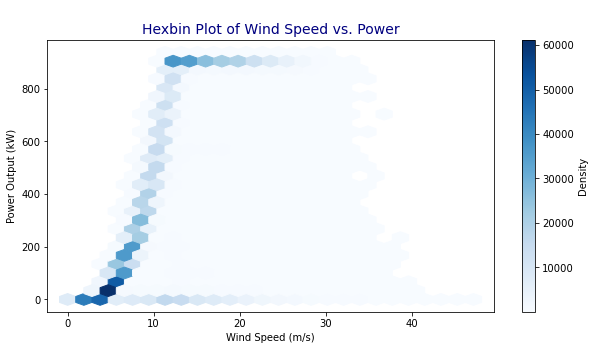

In [55]:
sns.reset_orig()
plt.figure(figsize=(10, 5))

plt.hexbin(x=turbine_telemetry_resampled['Wind_ms'], y=turbine_telemetry_resampled['Power_kw'],
           gridsize=25, cmap='Blues', mincnt=1)

plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Output (kW)')
plt.title('\nHexbin Plot of Wind Speed vs. Power',  size= 14, color="navy")


plt.colorbar(label='Density')
plt.show()

<br>

<span style = "color: #0033CC"> Upon initial observation, it seems that the cut-in speed lies at or below the 5 m/s threshold, while the rated speed is positioned at or above the 10 m/s threshold. Additionally, the cut-out speed seems to fall within the 25-30 m/s range. It also appears that there are instances where the generated power is 0 within the range of the cut-in speed to cut-out speed, which might indicate that the turbine was turned off during that period. Consequently, these instances will be omitted during the power curve parameter estimation phase to ensure accurate function fitting.

<span style = "color: #0033CC">Prior to this exclusion, we will estimate the three knots (changing points): cut-in speed, rated speed, and cut-out speed. We will start with determining the cut-in speed by analyzing the cumulative distribution of zero power generation within the wind speed interval of 0 to 6 m/s. This analysis aims to pinpoint a suitable wind speed threshold below which the majority of zero power generation instances occur.
Prior to this exclusion, we will estimate the three knots (changing points): cut-in speed, rated speed, and cut-out speed. We will start with determining the cut-in speed by analyzing the cumulative distribution of zero power generation within the wind speed interval of 0 to 6 m/s. This analysis aims to pinpoint a suitable wind speed threshold below which the majority of zero power generation instances occur.
    
<br>    


<br>

  


<span style =  "font-size: 15px; font-weight: 800">*Cut-in Speed*

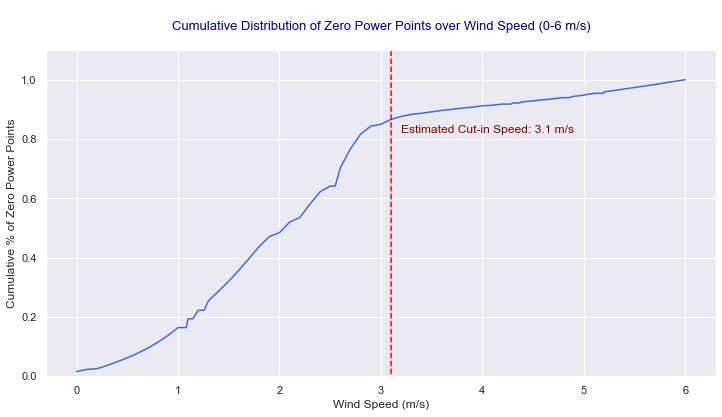

In [56]:
# Identify zero power points
zero_power_points = turbine_telemetry_resampled[(turbine_telemetry_resampled['Power_kw'] == 0)
                                               &
                                               (turbine_telemetry_resampled['Wind_ms'] <= 6)]

# Calculate the percentage of zero power points for each unique wind speed value
percentage_zero_power = zero_power_points.groupby('Wind_ms')['Power_kw'].count() / zero_power_points.shape[0]
# Calculate cumulative distribution
cumulative_percentage = percentage_zero_power.sort_index().cumsum()

# Plot cumulative distribution
sns.set_theme()
plt.figure(figsize=(12, 6))
plt.plot(cumulative_percentage.index, cumulative_percentage.values, linestyle='-', color = "royalblue")
plt.vlines(x=cumulative_percentage[cumulative_percentage > 0.85].index[0], ymin=-0.1, ymax=1.1, color="red", 
           linestyle="--", linewidth=1.5)
plt.text(cumulative_percentage[cumulative_percentage > 0.85].index[0] + 0.1, 0.82, 
         f'Estimated Cut-in Speed: {cumulative_percentage[cumulative_percentage >= 0.85].index[0]} m/s', 
         horizontalalignment='left', color = "darkred", size= 12)



plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Cumulative % of Zero Power Points')
plt.title('\nCumulative Distribution of Zero Power Points over Wind Speed (0-6 m/s)\n', size = 13, color = "navy")
plt.grid(True)
plt.ylim(0, 1.1)
plt.show()



<br>

<span style = "color: #0033CC"> Analyzing the plot, we observe that the cumulative distribution exhibits a rapid slope until it reaches a wind speed of around 3 m/s, after which the rate of increase decreases. We have decided to identify the cut-in speed at which the cumulative distribution exceeds 85% as this is where it appears the slope changes, which is found to be 3.1 m/s. 
    
<br>
    

In [57]:
cut_in_speed = cumulative_percentage[cumulative_percentage > 0.85].index[0]
cut_in_speed

3.1

<br>

<span style = "color: #0033CC"> Our subsequent analysis aims to estimate the rated speed and cut-out speed using a similar approach. However, instead of examining the distribution of zero generated power, we focus on the distribution of maximum power generated by the turbine. This rationale for being is that we expect that the power generated at the rated speed represents the maximum output achievable by the turbine. Consequently, we seek to identify the wind speed below which a majority of the instances of maximum power generation occur. As for the cut-out speed determination, our goal is to identify the wind speed below which nearly all instances of maximum power generation are recorded, effectively reaching close to 100% occurrence.
    
<br>


<br>

  


<span style =  "font-size: 15px; font-weight: 800">*Rated Speed and Cut-out Speed*

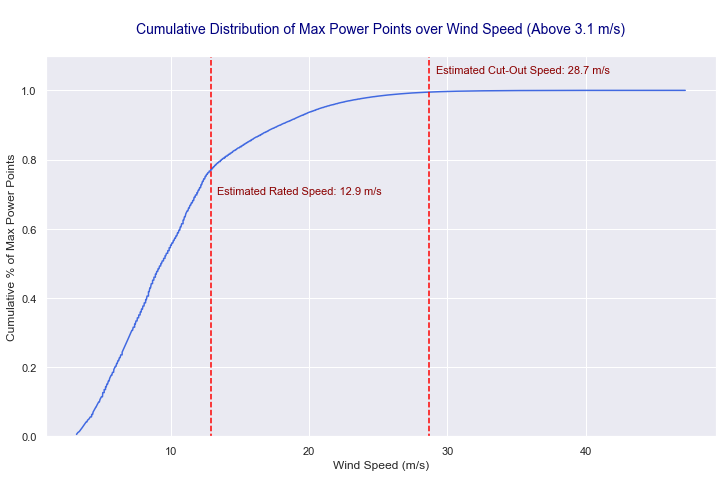

In [58]:
# Identify zero power points
max_power_points = turbine_telemetry_resampled[(turbine_telemetry_resampled['Power_kw'] >= np.max(turbine_telemetry_resampled['Power_kw']*0.95))  
                                               |
                                               (turbine_telemetry_resampled['Power_kw'] <= np.max(turbine_telemetry_resampled['Power_kw']*1.05))  
                                               &
                                               (turbine_telemetry_resampled['Wind_ms'] > cut_in_speed)]

percentage_max_power = max_power_points.groupby('Wind_ms')['Power_kw'].count() / \
max_power_points.shape[0]

# Calculate cumulative distribution
cumulative_percentage = percentage_max_power.sort_index().cumsum()

# Plot cumulative distribution
sns.set_theme()
plt.figure(figsize=(12, 7))
plt.plot(cumulative_percentage.index, cumulative_percentage.values,  linestyle='-', color = "royalblue")
plt.vlines(x=cumulative_percentage[cumulative_percentage > 0.77].index[0], ymin=-0.1, ymax=1.1, color="red", 
           linestyle="--", linewidth=1.5)
plt.text(cumulative_percentage[cumulative_percentage > 0.77].index[0] + 0.25, 0.70, 
         f' Estimated Rated Speed: {cumulative_percentage[cumulative_percentage >= 0.77].index[0]} m/s', 
         horizontalalignment='left', color = "darkred", size = 11)


plt.vlines(x=cumulative_percentage[cumulative_percentage > 0.995].index[0], ymin=-0.1, ymax=1.1, color="red", 
           linestyle="--", linewidth=1.5)
plt.text(cumulative_percentage[cumulative_percentage > 0.995].index[0] + 0.25, 1.05, 
         f' Estimated Cut-Out Speed: {cumulative_percentage[cumulative_percentage >= 0.995].index[0]} m/s', 
         horizontalalignment='left', color = "darkred", size = 11)


plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Cumulative % of Max Power Points')
plt.title(f'\nCumulative Distribution of Max Power Points over Wind Speed (Above {cut_in_speed} m/s)\n', 
          size= 14, color = "navy")
plt.grid(True)
plt.ylim(0, 1.1)
plt.show()



<br>

<span style = "color: #0033CC"> After examining the plot, it is clear that the cumulative distribution demonstrates a sharp incline until it reaches approximately 15 m/s wind speed. Beyond this point, the rate of increase diminishes, eventually approaching 100% around 28 m/s wind speed. We have decided to designate the rated speed at which the cumulative distribution exceeds 77%, as this is where the transition in slope becomes apparent, resulting in a rated speed of 12.9 m/s. Regarding the cut-out speed, we have opted to define it as the wind speed at which the cumulative distribution surpasses 99.5%, resulting in a cut-out speed of 28.7 m/s.
    
<br>
    

In [59]:
rated_speed = cumulative_percentage[cumulative_percentage > 0.77].index[0]

rated_speed

12.9

In [60]:
cut_out_speed = cumulative_percentage[cumulative_percentage > 0.995].index[0]

cut_out_speed

28.7


<br>

 

<span style =  "font-size: 15px; font-weight: 800">*Power Curve*

Now that we've identified the three "knots" in the power function described by Formula (5), we can move forward to create the power curve by estimating the combined factors of $A \times \rho$.
    
    
We will construct a generalized power curve using data from all time periods. Since we have established that power is consistently zero below the cut-in speed or above the cut-out speed, and that it is capped at the potential power when exceeding the rated speed up to the cut-out speed, our focus shifts to determining the factor influencing potential power generation within the wind speed range of the cut-in and rated speeds.
    
Furthermore, it is important to identify a set of "ideal" points where no inefficiency in power generation. This set encompasses:

- Readings where the generated power does not approach the setpoint, indicated by power values below 90% of the setpoint value. It is assumed that instances that exceed the 90% threshold are likely constrained by the setpoint safety measure.
- Readings where the generated power remains at zero despite the wind speed falling within the operational range (cut-in speed to rated speed).
    
<br>    


618490 points (61.27%) of all readings are included in the dataset to be used to estimate the power curve.



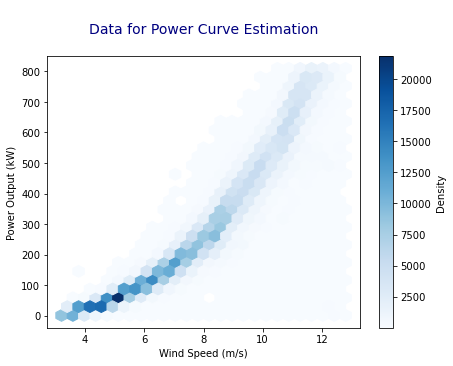

In [61]:
# Exclude inefficient points - curtailed by setpoint
power_curve_df =  complete_tt_resampled[complete_tt_resampled['Power_kw'] <= 
                                        (1-setpoint_grace_factor) * complete_tt_resampled['Setpoint_kw']]

# Limit the data to wind speeds between cut-in speed and rated speed to reduce noise
power_curve_df =  power_curve_df[(power_curve_df['Wind_ms'] > cut_in_speed) 
                                 &
                                (power_curve_df['Wind_ms'] < rated_speed)] 

# Exclude 0 power points between cut-in speed and rated speed
power_curve_df =  power_curve_df[(power_curve_df['Power_kw'] != 0) ] 



# Print information about the subset
print(f"\n{power_curve_df.shape[0]} points ({round(power_curve_df.shape[0]/complete_tt_resampled.shape[0]*100,2)}%)",
      "of all readings are included in the dataset to be used to estimate the power curve.\n")



##_________________________________________________________________________________________________________________________##



# Plot the data that will be used in the power curve estimation
sns.reset_orig()
plt.figure(figsize=(7, 5))


plt.hexbin(x=power_curve_df['Wind_ms'], y=power_curve_df['Power_kw'],
           gridsize=25, cmap='Blues', mincnt=1)

plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Output (kW)')
plt.title('\nData for Power Curve Estimation\n',  size= 14, color="navy")


plt.colorbar(label='Density')
plt.show()

<br>

<span style = "color: #0033CC"> With the suitable data, we now move on estimating the factor $A \times \rho$.
    
<br>
    


Optimized Factor rhoA: 0.9373598115833358 



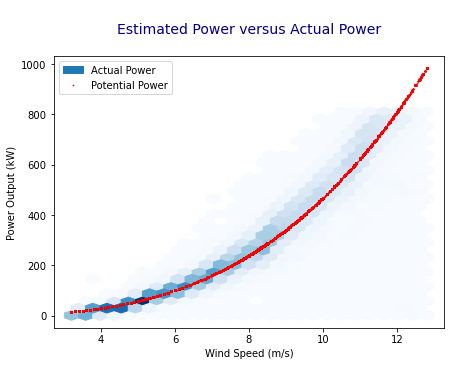

In [62]:
#Define power function that calculates potential power given a wind speed
def wind_power_function(v, cut_in_speed, rated_speed, cut_out_speed, rhoA):
    """
    Piecewise function representing wind power based on wind speed.
    
    Args:
    v (array-like): Wind speed.
    cut_in_speed (float): Cut-in speed of the wind turbine.
    rated_speed (float): Rated speed of the wind turbine.
    cut_out_speed (float): Cut-out speed of the wind turbine.
    rhoA (float): Product of air density and rotor area.
    
    Returns:
    array-like: Wind power.
    """
    wind_power = np.zeros_like(v)
    wind_power = np.where((v > cut_in_speed) & (v <= rated_speed), 0.5*rhoA*v**3, 0.5*rhoA*rated_speed**3)

    
    return wind_power


##_________________________________________________________________________________________________________________________##


# Estimate A x rho
initial_guess = 1  

popt, pcov = curve_fit(wind_power_function, power_curve_df['Wind_ms'].values, power_curve_df['Power_kw'].values, 
                           p0=[cut_in_speed, rated_speed, cut_out_speed, initial_guess], 
                           bounds=([cut_in_speed, rated_speed, cut_out_speed, 0], 
                                   [cut_in_speed+0.01, rated_speed+0.01, cut_out_speed+0.01, np.inf]))  

optimized_rhoA = popt[3]

print("\nOptimized Factor rhoA:", optimized_rhoA, '\n')


# Generate potential power using the estimated factor
power_curve_df['Potential_power_kw'] = 0.5 * optimized_rhoA * np.minimum(power_curve_df['Wind_ms'] , rated_speed)**3


##_________________________________________________________________________________________________________________________##

# Plot the the estimated power against the actual power generated for the ideal points
sns.reset_orig()
plt.figure(figsize=(7, 5))

plt.hexbin(x=power_curve_df['Wind_ms'], y=power_curve_df['Power_kw'],
           gridsize=25, cmap='Blues', mincnt=1, label = 'Actual Power')


plt.scatter(power_curve_df['Wind_ms'], power_curve_df['Potential_power_kw'], color='red', label='Potential Power', s= 0.5)


plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Output (kW)')
plt.title('\nEstimated Power versus Actual Power\n',  size= 14, color="navy")
plt.legend()


plt.show()

<br>

<span style = "color: #0033CC"> The estimated power curve closely matches the observed power generated at the ideal points. Consequently, we will utilise this function across all telemetry readings to estimate the potential power generation for each instance. By comparing this estimation with the actual power generated, we aim to discern the extent of unrealised power. To conclude, the estimated power function is:
    
    
$${Wind Power} = \begin{cases} 
      0 &   v \leq \text{3.1} \\
      \frac{1}{2} \times  0.956  \times  v^3  \hspace{50pt} & \text{3.1}\leq v \leq \text{12.5} \\
      \frac{1}{2} \times 0.956 \times  \text{12.5}^3  \hspace{50pt} & \text{12.5}\leq v \leq \text{28.7} \\
      0 &    v  \geq \text{28.7}\\
   \end{cases}
 \hspace{50pt} \text {Formula (6)}$$

    
<br>
    


<br>

### <span style = "color:blue">E.2 - Total Potential Power

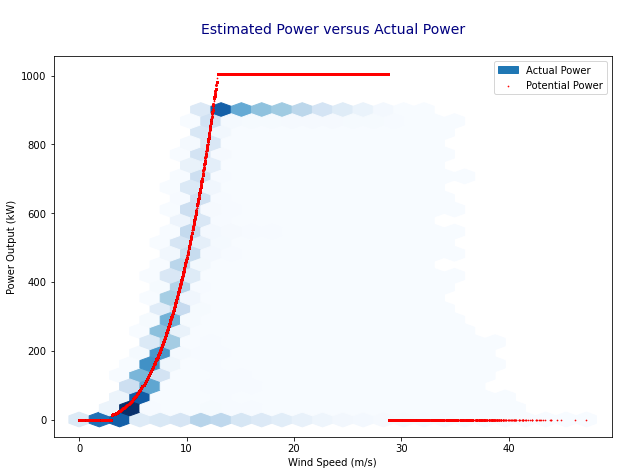

In [63]:
# Generate potential power using the estimated factor
complete_tt_resampled['Potential_power_kw'] = 0.5 * optimized_rhoA * \
np.where((complete_tt_resampled['Wind_ms'] < cut_in_speed) | (complete_tt_resampled['Wind_ms'] > cut_out_speed),
         0,
         np.minimum(complete_tt_resampled['Wind_ms'] , rated_speed)) **3


##_________________________________________________________________________________________________________________________##

# Plot the the estimated power against the actual power generated for the ideal points
plt.figure(figsize=(10, 7))

plt.hexbin(x=complete_tt_resampled['Wind_ms'], y=complete_tt_resampled['Power_kw'],
           gridsize=25, cmap='Blues', mincnt=1, label = 'Actual Power')


plt.scatter(complete_tt_resampled['Wind_ms'], complete_tt_resampled['Potential_power_kw'], color='red', label='Potential Power', s= 0.5)


plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Output (kW)')
plt.title('\nEstimated Power versus Actual Power\n',  size= 14, color="navy")
plt.legend()

plt.show()

<br>

<span style = "color: #0033CC">
    
From the plot, we can observe that:

. The actual power (blue hexbins) increases with wind speed up to a certain point, after which it plateaus, indicating the maximum power output of the turbine.

. The potential power (red scatter points) presents a steep curve, signifying that under ideal conditions, the power output could sharply increase with wind speed until it reaches its theoretical maximum.



<br>

***




## <span style = "color:navy"> F- Energy Generation and Consumption


This section consolidates all the necessary elements for assessing the extent of energy curtailment, if present. Energy curtailment encompasses two categories: unrealized power, resulting from enforced restrictions by the turbine and grid capacity (typically enforced by the setpoint), and under-consumption of generated energy, occurring when supply surpasses demand and potential export occurs. Initially, we will examine the entire spectrum, covering both types of curtailment, before focusing on the latter and exploring potential solutions.
    
    
It is important to remember some points here:
- The supply data available is for one wind turbine with measurements at one minute intervals. This means that we need to estimate the supply from all wind turbines in Orkney Islands. 
- The demand available is the average demand per household with measurements at 30 minute intervals. This means that we need to estimate the total residential demand for all the households in Orkney Islands
- Both sides of the are power-based measured at the kilowatt unit, not energy-based. Firstly, this means that we need to convert to energy, which is simply Power multiplied by time. Additioanlly, for simpler display of values, we will tranform the unit of measurement to be Megawatt instead of kilowatt.

    
As for the time scales, business decisions and planning are often done on a larger timescale, such as hourly or daily. Additionally, too low time intervals would lead to too much noise in the analysis. Therefore, we will be aggregating the data to an **hourly** basis thus ensuring that the analysis is directly relevant to business objectives and decision-making processes. Therefore, to conclude, the final unit of measurement for Energy will be Megawatt Hour. 

<br>
    
    

It is crucial to consider several key points here:

- Data Sources: Our supply data is derived from a single wind turbine, with measurements taken at one-minute intervals. Therefore, it is necessary to estimate the total supply from all wind turbines in the Orkney Islands.
    
- Demand Metrics: Conversely, our demand data represents the average demand per household, measured at 30-minute intervals. Estimating the total residential demand for all households in the Orkney Islands is essential for a comprehensive analysis.
    
- Unit of Measurement: Both supply and demand are measured in kilowatts, necessitating conversion to energy by multiplying power by time. Additionally, for clarity and simplicity, we will convert the unit of measurement to megawatts from kilowatts.
    
- Temporal Resolution: Business decisions and planning typically operate on larger timescales, such as hourly or daily. Utilizing too low a time interval could introduce excessive noise into the analysis. Therefore, we will aggregate the data to an hourly basis ensuring relevance to business objectives and decision-making processes.
    
Consequently, the final unit of measurement for energy will be the megawatt-hour, providing a standardized and meaningful metric for energy analysis. By addressing these considerations, we aim to provide a comprehensive assessment of energy curtailment, enabling informed solutionas and decision-making.

<br>



<br>

### <span style = "color:blue">F.1 - Hourly Energy Generation and Consumption


<br>
 

<span style =  "font-size: 15px; font-weight: 800">*Hourly Energy Calculation Methodology*

<br>
    
**Residential Demand per Household**

$\small{\text{Half-Hourly Household Energy Demand (MWh)} = \text{Mean Household Power (MW) per 30 minutes} \times \frac{1}{2}}$

$\small{\text{Hourly Household Energy Demand (MWh)} = \text{Sum of Energy for the two consecutive 30-minute intervals of the hour}} $

<br>
    
**Total Hourly Residential Demand**
    
$\small{\text{Total Hourly Energy Demand (MWh)} = \text{Hourly Household Energy Demand (MWh)} \times \text{Number of Households in Orkney Islands}} $    

<br>
    
***

**Supply per Turbine**

$\small{\text{Minute Turbine Energy Supply (MWh)} = \text{Mean Power (MW) per 1 minute} \times \frac{1}{60} }$

$\small{\text{Hourly Turbine Energy Supply (MWh)} = \text{Sum of Energy for the 60 consecutive 1-minute intervals of the hour} }$

<br>
    
**Total Hourly Wind Supply**
    
$\small{\text{Total Hourly Energy Supply (MWh)} = \text{Hourly Turbine Energy Supply (MWh)} \times \text{Number of Turbines in Orkney Islands}}$
    
This methodology assumes uniform generation capacity, mechanical metrics (e.g., rotor area), and operational and meteorological conditions across all turbines.
    
    
<br>
     


<br>    



<span style = "color:red">

Steps:
- Total Residential Demand: Assumptions about household count and multiply by Energy Consumption per hour
- Total Potential Energy: Assumptions about total number of turbines and their generation capacity to get total potential energy
- Estimated Actual Generated Energy: Assumptions about total number of turbines and their generation capacity to get total actual energy
- Total Export???
<br>

- Unrealised Energy =  Total Potential Energy - Estimated Actual Generated Energy
- Curtailed Energy =  Total Potential Energy - Total Residential Demand - Total Export
- Curtailed Energy due to under-consumption =  Estimated Actual Generated Energy - Total Residential Demand - Total Export

<br>

<span style =  "font-size: 15px; font-weight: 800">*Assumptions*



<br>


<span style = "color:red; font-size: 20px"> need to add comment on sources for the assumptions

In [64]:
num_households = np.max(residential_demand['N_households'])
num_households

10735.0

In [65]:
num_turbines = 533
generation_power_factor = 0.1

In [66]:
minutes_to_hour = 1/60
half_hour_to_hour = 1/2
KW_to_MW = 1/1000

<br>


<span style =  "font-size: 15px; font-weight: 800">*Total Hourly Residential Energy Demand*


In [94]:
# Convert Power to Megawatt
residential_demand['Demand_mean_mw'] = KW_to_MW * residential_demand['Demand_mean_kw']

# Convert half-hourly power to half-hourly energy
residential_demand['Demand_mean_mwh'] = half_hour_to_hour * residential_demand['Demand_mean_mw']

# Aggregate by hour
residential_demand_hr = residential_demand.set_index('Timestamp').resample('H').sum().reset_index()
residential_demand_hr.drop(['Demand_mean_kw', 'Demand_mean_mw', 'N_households', 'Household_Movement', 'Weighted_Mean_Demand'], 
                           axis=1, inplace= True)

# Check Aggregation
print(f"\nDifference in Energy before and after aggregation = \
      {(np.sum(residential_demand['Demand_mean_mwh'])-np.sum(residential_demand_hr['Demand_mean_mwh'])).astype(int)}\n")


# Estimate total demand for all households
residential_demand_hr['Demand_mwh'] = num_households * residential_demand_hr['Demand_mean_mwh']

# residential_demand_hr.drop(['Demand_mean_mwh'], 
#                            axis=1, inplace= True)

residential_demand_hr.head(10)


Difference in Energy before and after aggregation =       0



,Timestamp,Hour,Demand_mean_mwh,Demand_mwh
0,2017-01-01 00:00:00,0,0.000213,2.286832
1,2017-01-01 01:00:00,2,0.000181,1.944151
2,2017-01-01 02:00:00,4,0.000153,1.646249
3,2017-01-01 03:00:00,6,0.000134,1.433963
4,2017-01-01 04:00:00,8,0.000122,1.311819
5,2017-01-01 05:00:00,10,0.000121,1.293657
6,2017-01-01 06:00:00,12,0.000132,1.419320
7,2017-01-01 07:00:00,14,0.000149,1.595072
8,2017-01-01 08:00:00,16,0.000178,1.912648
9,2017-01-01 09:00:00,18,0.000223,2.398148


In [100]:
residential_demand_hr.describe()

,Hour,Demand_mean_mwh,Demand_mwh
count,8784.000000,8784.000000,8784.000000
mean,23.000000,0.000219,2.351936
std,13.845161,0.000090,0.962539
min,0.000000,0.000087,0.931043
25%,11.500000,0.000144,1.550804
50%,23.000000,0.000212,2.274890
75%,34.500000,0.000273,2.934192
max,46.000000,0.000507,5.442933


In [102]:
#day demand - too low - were expectig 8.5 to 10
0.000219*1000*24

5.256

<br>


<span style =  "font-size: 15px; font-weight: 800">*Total Hourly Wind Energy Supply*


In [78]:
# Convert Power to Megawatt
# complete_tt_resampled['Setpoint_mw'] = KW_to_MW * complete_tt_resampled['Setpoint_kw']
complete_tt_resampled['Power_mw'] = KW_to_MW * complete_tt_resampled['Power_kw']
complete_tt_resampled['Potential_power_mw'] = KW_to_MW * complete_tt_resampled['Potential_power_kw']

# Convert minute power to minute energy
# complete_tt_resampled['Setpoint_mwh'] = minutes_to_hour * complete_tt_resampled['Setpoint_mw']
complete_tt_resampled['Energy_mwh'] = minutes_to_hour * complete_tt_resampled['Power_mw']
complete_tt_resampled['Potential_energy_mwh'] = minutes_to_hour * complete_tt_resampled['Potential_power_mw']

# Aggregate by hour
aggregation_functions = {
    'Wind_ms': 'mean',
#     'Setpoint_mwh': 'mean',
    'Energy_mwh': 'sum',
    'Potential_energy_mwh': 'sum'
}

# Aggregate by hour
wind_supply_hr = complete_tt_resampled.set_index('Timestamp').resample('H').agg(aggregation_functions).reset_index()


# Check Aggregation
print(f"\nDifference in Energy before and after aggregation = \
      {(np.sum(wind_supply_hr['Energy_mwh'])-np.sum(wind_supply_hr['Energy_mwh'])).astype(int)}\n")


# Estimate total supply for all turbines
wind_supply_hr['Total_Energy_mwh'] = num_turbines * generation_power_factor * wind_supply_hr['Energy_mwh']
wind_supply_hr['Total_Potential_energy_mwh'] = num_turbines * generation_power_factor * wind_supply_hr['Potential_energy_mwh']

wind_supply_hr.drop(['Energy_mwh', 'Potential_energy_mwh'], 
                           axis=1, inplace= True)


wind_supply_hr.head(10)


Difference in Energy before and after aggregation =       0



,Timestamp,Wind_ms,Total_Energy_mwh,Total_Potential_energy_mwh
0,2016-01-01 00:00:00,13.868333,44.266538,47.068027
1,2016-01-01 01:00:00,16.463333,47.712383,53.107144
2,2016-01-01 02:00:00,12.855000,44.798650,46.302186
3,2016-01-01 03:00:00,11.286667,34.787133,36.249198
4,2016-01-01 04:00:00,8.725000,17.825297,17.276514
5,2016-01-01 05:00:00,9.215000,24.020533,22.059689
6,2016-01-01 06:00:00,8.351667,15.577813,15.253586
7,2016-01-01 07:00:00,9.096667,21.294238,19.519551
8,2016-01-01 08:00:00,8.275000,15.417913,14.442053
9,2016-01-01 09:00:00,7.626667,11.848590,11.789492



<br>

### <span style = "color:blue">F.2 - Curtailment Analysis

In [79]:
# Merge demand and supply data
demand_and_supply_hr = pd.merge(residential_demand_hr, wind_supply_hr, on='Timestamp', how='inner')

# Generate Date-based Columns
demand_and_supply_hr['MonthYear'] = demand_and_supply_hr['Timestamp'].dt.strftime('%B')
demand_and_supply_hr['Month'] = demand_and_supply_hr['Timestamp'].dt.strftime('%b-%Y')
demand_and_supply_hr['Year'] = demand_and_supply_hr['Timestamp'].dt.strftime('%Y')


demand_and_supply_hr.head(10)

,Timestamp,Hour,Demand_mwh,Wind_ms,Total_Energy_mwh,Total_Potential_energy_mwh,MonthYear,Month,Year
0,2017-01-01 00:00:00,0,2.286832,14.963333,47.517838,52.863148,January,Jan-2017,2017
1,2017-01-01 01:00:00,2,1.944151,16.731667,47.906040,53.390428,January,Jan-2017,2017
2,2017-01-01 02:00:00,4,1.646249,13.631535,33.260176,53.625663,January,Jan-2017,2017
3,2017-01-01 03:00:00,6,1.433963,17.337857,47.814542,53.157651,January,Jan-2017,2017
4,2017-01-01 04:00:00,8,1.311819,16.130000,47.891827,53.319898,January,Jan-2017,2017
5,2017-01-01 05:00:00,10,1.293657,13.640000,45.038500,48.635610,January,Jan-2017,2017
6,2017-01-01 06:00:00,12,1.419320,15.553333,47.381035,52.524470,January,Jan-2017,2017
7,2017-01-01 07:00:00,14,1.595072,20.380000,47.856293,53.469481,January,Jan-2017,2017
8,2017-01-01 08:00:00,16,1.912648,20.453333,47.878502,53.605038,January,Jan-2017,2017
9,2017-01-01 09:00:00,18,2.398148,16.740000,47.833197,53.263321,January,Jan-2017,2017


In [80]:
# Unrealised Energy
demand_and_supply_hr['unrealised_energy_mwh'] = \
demand_and_supply_hr['Total_Potential_energy_mwh'] - demand_and_supply_hr['Total_Energy_mwh']

# Unrealised Energy
demand_and_supply_hr['unconsumed_energy_mwh'] = \
demand_and_supply_hr['Total_Energy_mwh'] - demand_and_supply_hr['Demand_mwh']


<br>


<span style = "color:red; font-size: 20px"> Think there is somehting wrong with the calculation + This plot is not the best visualisation

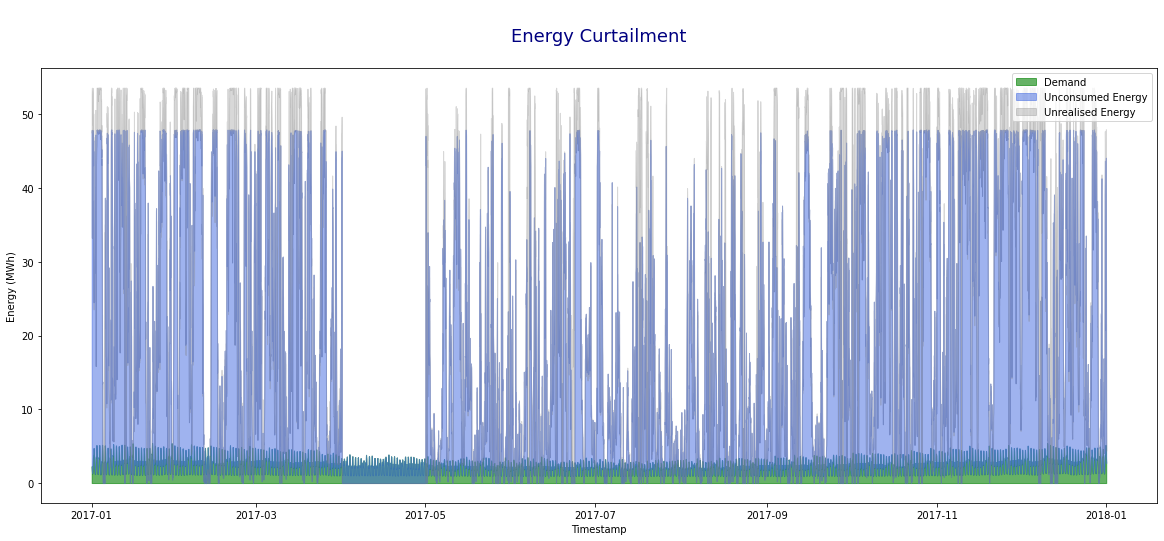

In [81]:
plt.figure(figsize=(20, 8))


# Plot Demand
plt.fill_between(demand_and_supply_hr['Timestamp'], demand_and_supply_hr['Demand_mwh'],
                 color='green', alpha=0.6, label='Demand')


# Plot Total Energy Generated
plt.fill_between(demand_and_supply_hr['Timestamp'], demand_and_supply_hr['Demand_mwh'],
                 demand_and_supply_hr['Total_Energy_mwh'],
                 color='royalblue', alpha=0.5, label='Unconsumed Energy')

# Plot Unrealised Energy 
plt.fill_between(demand_and_supply_hr['Timestamp'], demand_and_supply_hr['Total_Energy_mwh'],
                 demand_and_supply_hr['Total_Potential_energy_mwh'],
                 color='grey', alpha=0.3, label='Unrealised Energy')

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Energy (MWh)')
plt.title('\nEnergy Curtailment\n',  size= 18, color="navy")
plt.legend()

# Show plot
plt.show()

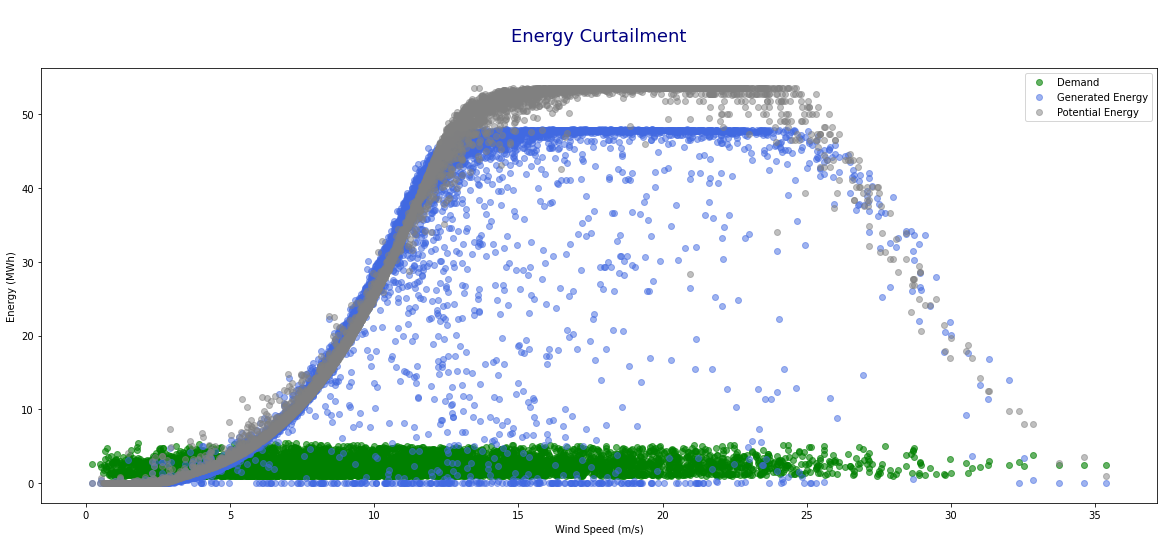

In [82]:
plt.figure(figsize=(20, 8))


# Plot Demand
plt.scatter(demand_and_supply_hr['Wind_ms'], demand_and_supply_hr['Demand_mwh'],
                 color='green', alpha=0.6, label='Demand')


# Plot Total Energy Generated
plt.scatter(demand_and_supply_hr['Wind_ms'], demand_and_supply_hr['Total_Energy_mwh'],
                 color='royalblue', alpha=0.5, label='Generated Energy')

# Plot Unrealised Energy 
plt.scatter(demand_and_supply_hr['Wind_ms'], demand_and_supply_hr['Total_Potential_energy_mwh'],
                 color='grey', alpha=0.5, label='Potential Energy')

# Add labels and title
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Energy (MWh)')
plt.title('\nEnergy Curtailment\n',  size= 18, color="navy")
plt.legend()

# Show plot
plt.show()

In [89]:
1-np.sum(demand_and_supply_hr['Demand_mwh'])/np.sum(demand_and_supply_hr['Total_Energy_mwh'])

0.8822052003848204

In [92]:
np.sum(demand_and_supply_hr['Demand_mwh'])

20590.153908485154

In [93]:
np.sum(demand_and_supply_hr['Total_Energy_mwh'])

174796.79897372823


<br>

### <span style = "color:blue">F.4 - Financial model

In order to explore how we can materialized the business model based on the assumptions derived from the research and EDA analysis, we develop a business case simulator that is described in the following chapter. We start by setting some baseline assumptions. We store them in a dictonary for easiness of access. More assumptions are plugged in throughout the code as we develop the business case. Other approximations or limitations to the assumptions are highlited here and discussed in more depth in the conclusion.

In [2]:
import numpy as np
# Instantiate the assumtions dictionary
assumptions = {}


The model hinges on the adoption of new users to the proprosed solution. One of the main drivers of new adoption is the marketing expenditure. We structure the expenditure into three periods:

1. Strong marketing
2. Run-off
3. Remaining months


In [3]:
# Number of months we will consider in the analysis
horizon = 36

# Creating months list
months = [i for i in range(1,horizon + 1)]

strong_budget = 300000
strong_months = 6
strong_budget_months = [strong_budget/strong_months for i in range(strong_months)]

run_off_budget = 30000
# Months in the run off phase
run_off_months = 6
run_off_budget_months = [run_off_budget/run_off_months for i in range(run_off_months)]

remaining_budget = 0
# Months with the remaining budget
remaining_months = max(months) - strong_months - run_off_months
remaining_months_budget_months = [remaining_budget/remaining_months for i in range(remaining_months)]

# Final marketing expenditure
marketing_expenditure = strong_budget_months + run_off_budget_months + remaining_months_budget_months


Next, we elaborate on the expected penetration from the marketing efforts above.

In [4]:
# Define penetration rates and periods
penetration_rate_1 = 0.5
len_rate_1 = 3
penetration_rate_2 = 1.5
len_rate_2 = 4
penetration_rate_3 = 1
len_rate_3 = 17
penetration_rate_4 = 0
len_rate_4 = max(months) - len_rate_1 - len_rate_2 - len_rate_3

# Penetration rate development
penetration_rate_pattern =  [penetration_rate_1 for i in range(len_rate_1)] + \
                            [penetration_rate_2 for i in range(len_rate_2)] + \
                            [penetration_rate_3 for i in range(len_rate_3)] + \
                            [penetration_rate_4 for i in range(len_rate_4)]


We define the rules to the penetration rates based on the lengths we described above. We also make differnet assumptions for the penetration rates per type of energy used (we also refer to this as segment) and the number of months required to reach the desired penetration rate

In [5]:
# Set the number of months to reach desired penetration rate assumption
assumptions['n_months_to_target_pr'] = 24

# Set the penetration rates assumptions
assumptions['electric_non_renewable_pr'] = .8
assumptions['electric_renewable_pr'] =.8
assumptions['oil_pr'] =  .3

# Instantiate monthly rates    
monthly_rate_nr = []
monthly_rate_r = []
monthly_rate_oil = []

def get_rates(penetration_rate, monthly_rate):
    monthly_rate = [0]
    for month in months[1:]:
        if (month <= assumptions['n_months_to_target_pr']) & (sum(monthly_rate) < penetration_rate):
            month_rate = penetration_rate/assumptions['n_months_to_target_pr']*penetration_rate_pattern[month-1]
        else:
            month_rate = 0    
        monthly_rate.append(month_rate)    
    return monthly_rate

# get final penetration rates
monthly_rate_nr = get_rates(assumptions['electric_non_renewable_pr'], monthly_rate_nr)
monthly_rate_r = get_rates(assumptions['electric_renewable_pr'], monthly_rate_r)    
monthly_rate_oil = get_rates(assumptions['oil_pr'], monthly_rate_r)

In [6]:
# Set the assumption for the number of households
assumptions['n_households'] = 10735

# Set the heating energy distribution assumptions
assumptions['electric_non_renewable_dist'] = .31
assumptions['electric_renewable_dist'] =.1
assumptions['oil_dist'] =.36

# Set the penetration rates assumptions
assumptions['electric_non_renewable_n_households'] = round(assumptions['electric_non_renewable_dist']*assumptions['n_households'],0)
assumptions['electric_renewable_n_households'] = round(assumptions['electric_renewable_dist']*assumptions['n_households'],0)
assumptions['oil_n_households'] =  round(assumptions['oil_dist']*assumptions['n_households'],0) 


In [7]:
# Get Number of new adopters by segment
electric_renewable_adopters = np.array(assumptions['electric_renewable_n_households'])*monthly_rate_r
electric_non_renewable_adopters = np.array(assumptions['electric_non_renewable_n_households'])*monthly_rate_nr
oil_adopters = np.array(assumptions['oil_n_households'])*monthly_rate_oil

# Get total new adopters
total_adopters = list(electric_non_renewable_adopters + electric_renewable_adopters + oil_adopters)


In [8]:
# Set electricity consumption assumption in kWh
assumptions['elec_cons_khw'] = 628

# Percentage of people who will increase their consumption sue to lower monthly costs
assumptions['change_cons'] =0.65

# Set electricity price assumptions
assumptions['elec_price_non_renewable'] = 0.1757894737
assumptions['elec_price_renewable'] = 0.1757894737
assumptions['elec_price_oil'] = 0.05981666667

# Set wind generated price assumptions
assumptions['wind_price_non_renewable'] = 0.1525949123
assumptions['wind_price_renewable'] = 0.1525949123
assumptions['wind_price_oil'] = 0.06640898246

# Set CO2 costs assumptions. This drives the government's subsidy
assumptions['co2_cost_non_renewable'] = 0.00108
assumptions['co2_cost_renewable'] = 0
assumptions['co2_cost_oil'] = 0.00145


# Retail price of wind generated energy that would be curtailed
assumptions['curtailed_wind_price'] = 0.12

# Expected changes in consumption
exp_change_cons_renewable = max((assumptions['elec_price_renewable']-assumptions['wind_price_renewable'] - 
                                    (assumptions['co2_cost_renewable'] - assumptions['co2_cost_renewable']))*
                                    (assumptions['elec_cons_khw']/assumptions['wind_price_renewable'])*assumptions['change_cons'],0)

exp_change_cons_non_renewable = max((assumptions['elec_price_non_renewable']-assumptions['wind_price_non_renewable'] - 
                                (assumptions['co2_cost_renewable'] - assumptions['co2_cost_non_renewable']))*
                                (assumptions['elec_cons_khw']/assumptions['wind_price_non_renewable'])*assumptions['change_cons'],0)

exp_change_cons_oil = max((assumptions['elec_price_oil']-assumptions['wind_price_oil'] - 
                      (assumptions['co2_cost_renewable'] - assumptions['co2_cost_oil']))*
                    (assumptions['elec_cons_khw']/assumptions['wind_price_oil'])*assumptions['change_cons'],0)

# New consumption per segment 
new_cons_renewable = assumptions['elec_cons_khw'] + exp_change_cons_renewable
new_cons_non_renewable = assumptions['elec_cons_khw'] + exp_change_cons_renewable
new_cons_oil = assumptions['elec_cons_khw'] + exp_change_cons_oil

# New costs per segment 
new_cost_renewable = new_cons_renewable*(assumptions['wind_price_renewable'] - (assumptions['co2_cost_renewable'] - assumptions['co2_cost_renewable']))
new_cost_non_renewable = new_cons_non_renewable*(assumptions['wind_price_non_renewable'] - (assumptions['co2_cost_non_renewable'] - assumptions['co2_cost_renewable']))
new_cost_oil = new_cons_oil*(assumptions['wind_price_oil'] - (assumptions['co2_cost_oil'] - assumptions['co2_cost_renewable']))


Next we will put all of the segment variables togehter

In [9]:
# Set the number of dr devices per household
assumptions['n_dr_devices_per_household'] = 4

# Set the number of quantum storage devices per household
assumptions['n_quantum_storage_devices_per_household'] = 3

# Set the number of quantum cylinders per household
assumptions['n_quantum_cylinder_devices_per_household'] = 1

# Get the total number of dr devices sold per month
total_dr_devices_per_month = list(assumptions['n_dr_devices_per_household'] * np.array(total_adopters))

# Get the total number of quantum heaters devices sold per month --> Oil adopters times the total devices needed per hh
total_quantum_devices_per_month = list((assumptions['n_quantum_storage_devices_per_household'] + 
                                       assumptions['n_quantum_cylinder_devices_per_household']) * np.array(oil_adopters))


# Expected change in energy consumption per household
consumption_change_per_month = list(np.nan_to_num((exp_change_cons_renewable*np.cumsum(electric_renewable_adopters) + 
                                    exp_change_cons_non_renewable*np.cumsum(electric_non_renewable_adopters) + 
                                    exp_change_cons_oil*np.cumsum(oil_adopters))/np.cumsum(total_adopters),nan=0))

# Get the total new consumption per month
total_consumption_per_month = [x + assumptions['elec_cons_khw'] for x in consumption_change_per_month]

# First value to zero as there is no consumption in the initial month
total_consumption_per_month[0] = 0


# Expected current energy prices
expected_current_energy_prices = list(np.nan_to_num((assumptions['elec_price_renewable']*np.cumsum(electric_renewable_adopters) + 
                                    assumptions['elec_price_non_renewable'] *np.cumsum(electric_non_renewable_adopters) + 
                                    assumptions['elec_price_oil']*np.cumsum(oil_adopters))/np.cumsum(total_adopters),nan=0))

current_energy_costs_per_household = list(np.array(expected_current_energy_prices)*assumptions['elec_cons_khw'])

new_energy_costs_per_household = list(np.nan_to_num((new_cost_renewable*np.cumsum(electric_renewable_adopters) + 
                                    new_cost_non_renewable*np.cumsum(electric_non_renewable_adopters) + 
                                    new_cost_oil*np.cumsum(oil_adopters))/np.cumsum(total_adopters),nan=0))


C:\Users\Bernardo Carvalho\AppData\Local\Temp\ipykernel_8268\1017383542.py:19: RuntimeWarning: invalid value encountered in divide
  consumption_change_per_month = list(np.nan_to_num((exp_change_cons_renewable*np.cumsum(electric_renewable_adopters) +
C:\Users\Bernardo Carvalho\AppData\Local\Temp\ipykernel_8268\1017383542.py:31: RuntimeWarning: invalid value encountered in divide
  expected_current_energy_prices = list(np.nan_to_num((assumptions['elec_price_renewable']*np.cumsum(electric_renewable_adopters) +
C:\Users\Bernardo Carvalho\AppData\Local\Temp\ipykernel_8268\1017383542.py:37: RuntimeWarning: invalid value encountered in divide
  new_energy_costs_per_household = list(np.nan_to_num((new_cost_renewable*np.cumsum(electric_renewable_adopters) +


In [10]:
# Total new wind energy sold through the program
wind_energy_sold = list(total_consumption_per_month*np.cumsum(total_adopters))

# Total revenue from sold wind energy
wind_energy_revenue = assumptions['wind_price_renewable']*np.array(new_cons_renewable)*np.cumsum(electric_renewable_adopters) + \
                      assumptions['wind_price_non_renewable']*np.array(new_cons_non_renewable)*np.cumsum(electric_non_renewable_adopters)+\
                      assumptions['wind_price_oil']*np.array(new_cons_oil)*np.cumsum(oil_adopters)


# Kaluza's fee to the excess revenue created from the program
assumptions['kaluza_top_fee'] = .5
assumptions['kaluza_bottom_fee'] = .2
assumptions['dr_upfront_investment'] = 190
assumptions['n_dr_devices_per_household'] = 4
assumptions['quantum_boiler_upfront_costs'] = 1199.8425
assumptions['quantum_storage_upfront_costs'] = 2067.525
assumptions['installation_cost'] = 90


# Kaluza's fee per month
kaluza_fee = [assumptions['kaluza_top_fee'] if x < assumptions['n_months_to_target_pr'] 
              else assumptions['kaluza_bottom_fee'] for x in months]

# Kaluza's revenue per month
kaluza_wind_revenue = list(np.array(kaluza_fee) * np.array(wind_energy_revenue))

# Implementation costs for a single household
implementation_costs = assumptions['n_dr_devices_per_household']*assumptions['dr_upfront_investment']
quantum_costs = assumptions['quantum_boiler_upfront_costs'] + assumptions['quantum_storage_upfront_costs']
installation_costs = assumptions['n_dr_devices_per_household']*assumptions['installation_cost']

# Total DR costs
total_dr_costs = list(implementation_costs * np.array(total_adopters))

# Total DR installation costs
total_dr_installation = list(installation_costs * np.array(total_adopters))

# Total Quantum costs
total_quantum_costs = list(quantum_costs * np.array(oil_adopters))

Start now with the costs

<br>

<hr style="border: 0.8px dashed #7A7F92;">

In [12]:
# Kaluza's discount months
discount_rate_1 = [1, 1, .75, .5, .25, 0]
first_hh_joined = [0, 100, 350, 850, 1850, 12668]

# Function to get the proper index of the rate
def find_last_index_smaller(first_hh_joined, value_to_find):
    for i in range(len(first_hh_joined)):
        if first_hh_joined[i] >= value_to_find:
            if i > 0:
                last_index_smaller = i - 1
            else:
                last_index_smaller = -1
            break
    else:
        last_index_smaller = len(first_hh_joined) - 1

    return last_index_smaller


kaluza_dr_cost_total = []
kaluza_dr_installation_costs = []
dr_discount = 0

for i,base in enumerate(np.cumsum(total_adopters)):
    last_index_smaller = find_last_index_smaller(first_hh_joined, base)
    dr_discount = (discount_rate_1[last_index_smaller] + discount_rate_1[last_index_smaller+1])/2
    kaluza_dr_cost_total.append(dr_discount*total_dr_costs[i])
    kaluza_dr_installation_costs.append(dr_discount*total_dr_installation[i])

In [13]:
# Kaluza's discount months
discount_rate_quantum = [.75, .75, .5, .25, 0]
first_hh_joined_quantum = [0, 25, 75, 175, 3865]

kaluza_quantum_cost_total = []
quantum_discount = 0

for i,base in enumerate(np.cumsum(oil_adopters)):
    last_index_smaller = find_last_index_smaller(first_hh_joined_quantum, base)
    quantum_discount = (discount_rate_quantum[last_index_smaller] + discount_rate_quantum[last_index_smaller+1])/2
    kaluza_quantum_cost_total.append(quantum_discount*total_quantum_costs[i])

In [20]:
# Total revenue
total_revenue = np.array(kaluza_wind_revenue) + np.array(total_dr_costs)

# Bonus per unit sold
assumptions['bonus_per_unit'] = 15

assumptions['harware_sale_price'] = 100

assumptions['cost_%'] = .1

# COGS per DR device (assuming a 10% cost of production)
assumptions['hardware_cogs'] = assumptions['harware_sale_price']*assumptions['cost_%']

# Total hardware COGS
total_hardware_cogs = assumptions['hardware_cogs'] * np.array(total_adopters) * assumptions['n_dr_devices_per_household']

# Total bonuses
total_bonuses = assumptions['bonus_per_unit'] * assumptions['n_dr_devices_per_household'] * np.array(total_adopters)

# Total COGS
total_cogs = np.array(kaluza_dr_cost_total) + \
             np.array(kaluza_quantum_cost_total) + \
             np.array(kaluza_dr_installation_costs) + \
             np.array(total_bonuses) + \
             np.array(total_hardware_cogs)

gross_margin = total_revenue - total_cogs

In [25]:
# Kaluza's cost tier by number of devices in operation
operating_costs_n_devices = [22000, 45000, 112000, 224000]
discount_rate_n_devices = [0, 1000, 5000, 10000]

drs_operating_costs = []
costs = 0

for i,n_devices in enumerate(np.cumsum(total_dr_devices_per_month)):
    last_index_smaller = find_last_index_smaller(discount_rate_n_devices, n_devices)
    operating_costs = operating_costs_n_devices[last_index_smaller]
    drs_operating_costs.append(operating_costs/12)

# Fixing the first value
drs_operating_costs[0] = operating_costs_n_devices[0]/12



[1833.3333333333333,
 1833.3333333333333,
 1833.3333333333333,
 3750.0,
 3750.0,
 3750.0,
 9333.333333333334,
 9333.333333333334,
 9333.333333333334,
 9333.333333333334,
 9333.333333333334,
 9333.333333333334,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668,
 18666.666666666668]

In [23]:
np.cumsum(total_dr_devices_per_month)

array([    0.        ,   390.09166667,   780.18333333,  1950.45833333,
        3120.73333333,  4291.00833333,  5461.28333333,  6241.46666667,
        7021.65      ,  7801.83333333,  8582.01666667,  9362.2       ,
       10142.38333333, 10922.56666667, 11702.75      , 12482.93333333,
       13263.11666667, 14043.3       , 14823.48333333, 15603.66666667,
       16383.85      , 17164.03333333, 17944.21666667, 18724.4       ,
       18724.4       , 18724.4       , 18724.4       , 18724.4       ,
       18724.4       , 18724.4       , 18724.4       , 18724.4       ,
       18724.4       , 18724.4       , 18724.4       , 18724.4       ])

# <span style="color:steelblue"> Results
    
<span style="color:red"> Instructions: A presentation and summary of the data using means, histograms and other descriptive statistics - Figures, tables and graphs, insofar as they help to enhance the clarity of the information (include captions) - An explanation of any figures, tables or graphs.

<span style="color:red">Insights: How does the total energy curtailed compare to the total potential energy? What does this mean?

<span style="color:red">Presenting the data: Present the data in a way that would display the relationship between curtailed energy,
demand, export etc over a typical day, or over a year etc - Presenting data in a way that make it easier to draw insights e.g. trends in the data etc  - Use the insights drawn to develop energy solutions for Orkney    